In [36]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Problem 1A

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

In [3]:
sal = pd.read_csv('SalaryData.csv')
df  =pd.read_csv('SalaryData.csv')

In [4]:
sal.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [5]:
sal.describe(include = 'all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [6]:
sal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [7]:
sal['Education'] = pd.Categorical(sal['Education'])
sal['Occupation'] = pd.Categorical(sal['Occupation'])

In [8]:
education = list(sal.Education.unique())
occupation = list(sal.Occupation.unique())

In [9]:
edu_salary = pd.DataFrame()

In [10]:
sal.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

### 1A.1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

In [11]:
sal_edu = sal[['Education','Salary']]

In [12]:
sal_occ = sal[['Occupation','Salary']]

In [13]:
sal_occ.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

#### 1a. Postulate the Null and Alternate Hypothesis for Education Qualification

$H_0$: The mean Salary for all Education field remains the same

$H_1$: The mean Salary of Education field is different



#### 1b. Postulate the Null and Alternate Hypothesis for Occupaction

$H_0$: The mean Salary Across all Occupation field remains the same

$H_1$: The mean Salary of various Occupation field is different


### 1A.2 . Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

##### For Education

In [14]:
n= len(sal.Salary) #total no of observations
k=len(education) #no of groups

In [15]:
#Degree of freedom between groups
dfb=k-1
print('Degree of Freedom between groups',dfb)
#Degree of freedom within groups
dfw=n-k
print('Degree of Freedom within groups',dfw)

Degree of Freedom between groups 2
Degree of Freedom within groups 37


Degree of Freedom between groups 2

Degree of Freedom within groups 37

In [16]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [17]:
formula = 'Salary ~ C(Education)'
model = ols(formula, sal).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


|| df | sum_sq | mean_sq | F | PR(>F) |
| :- | -: | -: | -: | -: | -: |
|**C(Education)** | 2.0 | 1.026955e+11 | 5.134773e+10 | 30.95628 | **1.257709e-08** |
|**Residual**     | 37.0 | 6.137256e+10 | 1.658718e+09 | NaN | NaN |

Since the p value is less than the significance level $\alpha$(0.05), we can reject the null hupothesis and state that there is a difference in the mean salaries across various Education Field.

### 1A.3 . Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

##### For Occupation

In [18]:
n1= len(sal.Salary) #total no of observations
k1= len(occupation) #no of groups
#Degree of freedom between groups
dfb1=k1-1
print('Degree of Freedom between groups',dfb1)
#Degree of freedom within groups
dfw1=n1-k1
print('Degree of Freedom within groups',dfw1)

Degree of Freedom between groups 3
Degree of Freedom within groups 36


Degree of Freedom between groups 3

Degree of Freedom within groups 36

In [19]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, sal).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


|| df | sum_sq | mean_sq | F | PR(>F) |
| :- | -: | -: | -: | -: | -: |
|**C(Occupation)** | 3.0 | 1.125878e+10 | 3.752928e+09 | 0.884144 | **0.458508** |
|**Residual**     | 36.0 | 1.528092e+11 | 4.244701e+09 | NaN | NaN |

Now, we see that the corresponding p-value is greater than $\alpha$(0.05). Thus, we fail to reject the Null Hypothesis (H0) and state that there is no difference in the mean salaries across various Occupation Field.

### 1A.4 . If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result.

In [20]:
round(sal.groupby('Education').mean(),2)

Salary
Education            
 Bachelors  165152.93
 Doctorate  208427.00
 HS-grad     75038.78

| **Education** | **Salary** |
|-: | -: |
| **Bachelors** | 165152.93 |
| **Doctorate** | 208427.00 |
| **HS-grad** | 75038.78 |

* We Can concure that the mean Salary of various Education field is different from the above table
* Doctorate Field seem to have the highest Salary package when compared to others
* This indicates that Higher the edcation field Better the Salary Expectency 

# Problem 1B

### 1B.1 . What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

In [46]:
sal_edu = sal[['Education','Salary']].sort_values('Education').reset_index(drop = True)
sal_occ = sal[['Occupation','Salary']].sort_values('Occupation').reset_index(drop = True)

In [47]:
bachelors = sal_edu.loc[0:15,'Salary']
doctorate = sal_edu.loc[15:31,'Salary']
HS_grad = sal_edu.loc[31:40,'Salary']

adm_clerical = sal_occ.loc[0:10,'Salary']
exec_managerial = sal_occ.loc[10:15,'Salary']
prof_speciality = sal_occ.loc[15:28,'Salary']
sales = sal_occ.loc[28:40,'Salary']

In [48]:
from scipy import stats

SHAPIRO TEST

In [49]:
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#alpha = 0.05

print(stats.shapiro([bachelors]))
print(stats.shapiro([doctorate]))
print(stats.shapiro([HS_grad]))

print(stats.shapiro([adm_clerical]))
print(stats.shapiro([exec_managerial]))
print(stats.shapiro([prof_speciality]))
print(stats.shapiro([sales]))

ShapiroResult(statistic=0.9625411629676819, pvalue=0.7080602049827576)
ShapiroResult(statistic=0.8669456243515015, pvalue=0.019654255360364914)
ShapiroResult(statistic=0.885286271572113, pvalue=0.1783432960510254)
ShapiroResult(statistic=0.9105437994003296, pvalue=0.24753518402576447)
ShapiroResult(statistic=0.8690852522850037, pvalue=0.22258324921131134)
ShapiroResult(statistic=0.7667546272277832, pvalue=0.0019934121519327164)
ShapiroResult(statistic=0.8897126913070679, pvalue=0.11683900654315948)


* For bachelors, ShapiroResult(statistic=0.9625411629676819, pvalue=0.7080602049827576)
* For doctorate, ShapiroResult(statistic=0.8669456243515015, pvalue=0.019654255360364914)
* For HS_grad, ShapiroResult(statistic=0.885286271572113, pvalue=0.1783432960510254)
* For adm_clerical, ShapiroResult(statistic=0.9105437994003296, pvalue=0.24753518402576447)
* For exec_managerial, ShapiroResult(statistic=0.8690852522850037, pvalue=0.22258324921131134)
* For prof_speciality, ShapiroResult(statistic=0.7667546272277832, pvalue=0.0019934121519327164)
* For sales, ShapiroResult(statistic=0.8897126913070679, pvalue=0.11683900654315948)

We see that, except for prof_speciality salary day, rest all are Normally Distributed.
We won't be converting it for not but we can use transformation techniques to normalize data

LEVENE TEST

In [50]:
#Homogeniety
#The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
#alpha = 0.05
print(stats.levene(bachelors,doctorate,HS_grad))
print(stats.levene(adm_clerical,exec_managerial,prof_speciality,sales))

LeveneResult(statistic=2.003165251179662, pvalue=0.14855191967482995)
LeveneResult(statistic=2.4685686855381976, pvalue=0.07631646420034875)


* For Education, LeveneResult(statistic=2.003165251179662, pvalue=0.14855191967482995)
* For Occupation, LeveneResult(statistic=2.4685686855381976, pvalue=0.07631646420034875)
* Here we infer that Variance across all levels are Equal since p value is greater than alpha

Let us now perform the Two Way ANOVA to analyse the effect of both the treatments on the 'Salary' variable.

In [51]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, sal).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

|| DF | sum_sq | mean_sq | F | PR(>F) |
| -: | -: | -: | -: | -: | -: |
| **C(Education)** | 2.0 | 1.026955e+11 | 5.134773e+10 | 31.257677 | 1.981539e-08 |
| **C(Occupation)** | 3.0 | 5.519946e+09 | 1.839982e+09	| 1.120080 | 3.545825e-01 |
| **Residual** | 34.0 | 5.585261e+10 | 1.642724e+09 | NaN | NaN |

**We see that P value for both the treatments is less than Significant value $\alpha$(0.05)**

**Let us check whether there is any interaction effect between the treatments.**

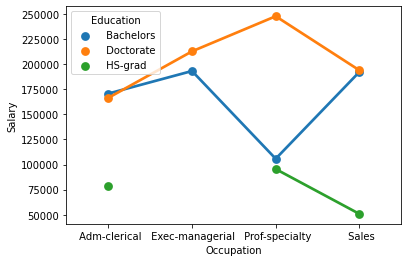

In [52]:
sns.pointplot(x='Occupation', y='Salary', data=sal,ci = None, hue = 'Education');

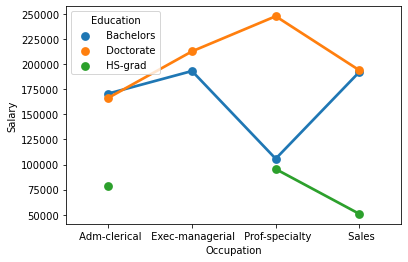

Fig1. Point Plot to check whether there is any interaction effect between the treatments

**We can see that there is some sort of interaction between the two treatments**

### 1B.2 . Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

#### The Hypothesis for the Two Way ANOVA are:
    
#### $H_0$: The mean Salary across all the levels are same
#### $H_a$: For at least one level of Education or Occupation, mean Salary is different

In [53]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, sal).fit()
aov_table = anova_lm(model)
(aov_table)

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

|| DF | sum_sq | mean_sq | F | PR(>F) |
| -: | -: | -: | -: | -: | -: |
| **C(Education)** | 2.0 | 1.026955e+11 | 5.134773e+10 | 72.211958 | 5.466264e-12 |
| **C(Occupation)** | 3.0 | 5.519946e+09 | 1.839982e+09	| 2.587626	 | 7.211580e-02 |
| **C(Education):C(Occupation)** | 6.0 | 3.634909e+10 | 6.058182e+09 | 8.519815 | 2.232500e-05 |
| **Residual** | 29.0 | 2.062102e+10 | 7.110697e+08 | NaN | NaN |

**Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.And we see that the p-value of the interaction effect term of 'Education' and 'Occupation' suggests that the Null Hypothesis is rejected in this case.**

### 1B.3 . Explain the business implications of performing ANOVA for this particular case study.

* ANOVA is used to compare different levels of Treatment, here in this case is Education and Occupation, based on the samples collected.
* Education Field in itself had a variation when its levels are compared but we see a large change in F stats when Co-relation between Education and Occupation is introduced. 
* We see that Occupation field in itself doesn't so much difference with Salary package but the introduction of corelation between Education field and occupation, there is a greater difference as compared with only Occupation field.
* We reject the null hypothesis and infer that Higher the Edcation field Better the Salary Expectency and this also affects the Occupation we choose with the level of Education a Sample has.

# Problem 2

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [54]:
edu = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [55]:
edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

**Sample of the Dataset**

||Names                       |Apps|Accept|Enroll|Top10perc|Top25perc|F.Undergrad|P.Undergrad|Outstate|Room.Board|Books|Personal|PhD|Terminal|S.F.Ratio|perc.alumni|Expend|Grad.Rate|
|------|----------------------------|----|------|------|---------|---------|-----------|-----------|--------|----------|-----|--------|---|--------|---------|-----------|------|---------|
|0     |Abilene Christian University|1660|1232  |721   |23       |52       |2885       |537        |7440    |3300      |450  |2200    |70 |78      |18.1     |12         |7041  |60       |
|1     |Adelphi University          |2186|1924  |512   |16       |29       |2683       |1227       |12280   |6450      |750  |1500    |29 |30      |12.2     |16         |10527 |56       |
|2     |Adrian College              |1428|1097  |336   |22       |50       |1036       |99         |11250   |3750      |400  |1165    |53 |66      |12.9     |30         |8735  |54       |
|3     |Agnes Scott College         |417 |349   |137   |60       |89       |510        |63         |12960   |5450      |450  |875     |92 |97      |7.7      |37         |19016 |59       |
|4     |Alaska Pacific University   |193 |146   |55    |16       |44       |249        |869        |7560    |4120      |800  |1500    |76 |72      |11.9     |2          |10922 |15       |


Dataset has 777 different Colleges / Universities with each College / University having different fields such as 
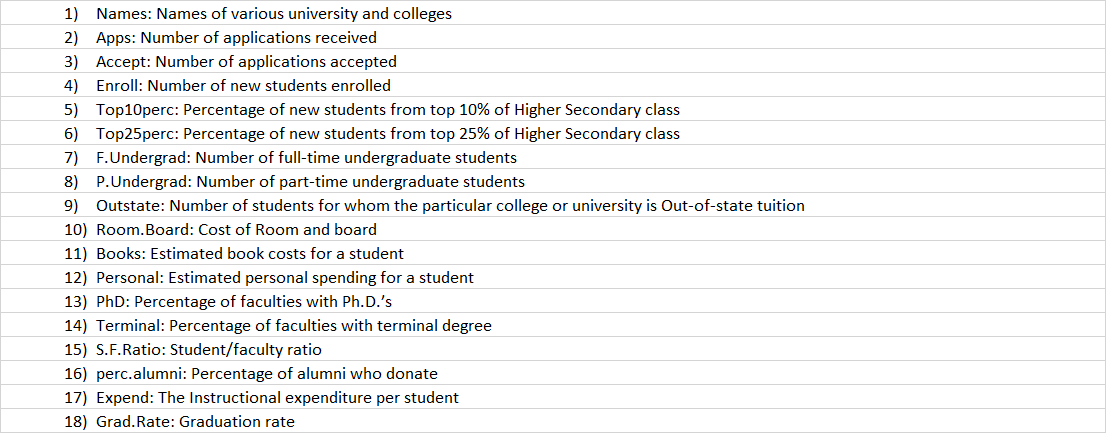

In [56]:
print("no. of rows: ",edu.shape[0], "\n""no. of columns: ",edu.shape[1])

no. of rows:  777 
no. of columns:  18


The Dataset contains 
no. of rows:  777 
& no. of columns:  18

In [57]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

The Type of Variables in the Data Frame and a check for missing Values in the Dataset is as below:

There are a Totla of 777 Rows and 18 Columns in the Dataset. Out of 18 Columsn, we observe only 1 Object type and 1 Float Type. Rest are all Type Integer.
Data columns (total 18 columns):

|| |Column|Non-Null|Count|Dtype|
|------|--|------|--------|-----|-----|
|      |0  |Names |777     |non-null|object|
|      |1  |Apps  |777     |non-null|int64|
|      |2  |Accept|777     |non-null|int64|
|      |3                           |Enroll|777     |non-null|int64|
|      |4                           |Top10perc|777     |non-null|int64|
|      |5                           |Top25perc|777     |non-null|int64|
|      |6                           |F.Undergrad|777     |non-null|int64|
|      |7                           |P.Undergrad|777     |non-null|int64|
|      |8                           |Outstate|777     |non-null|int64|
|      |9                           |Room.Board|777     |non-null|int64|
|      |10                          |Books |777     |non-null|int64|
|      |11                          |Personal|777     |non-null|int64|
|      |12                          |PhD   |777     |non-null|int64|
|      |13                          |Terminal|777     |non-null|int64|
|      |14                          |S.F.Ratio|777     |non-null|float64|
|      |15                          |perc.alumni|777     |non-null|int64|
|      |16                          |Expend|777     |non-null|int64|
|      |17                          |Grad.Rate|777     |non-null|int64|


We see that there are no missing values present in the Dataset

In [58]:
round(edu.describe().T,2)

count      mean      std     min     25%     50%      75%  \
Apps         777.0   3001.64  3870.20    81.0   776.0  1558.0   3624.0   
Accept       777.0   2018.80  2451.11    72.0   604.0  1110.0   2424.0   
Enroll       777.0    779.97   929.18    35.0   242.0   434.0    902.0   
Top10perc    777.0     27.56    17.64     1.0    15.0    23.0     35.0   
Top25perc    777.0     55.80    19.80     9.0    41.0    54.0     69.0   
F.Undergrad  777.0   3699.91  4850.42   139.0   992.0  1707.0   4005.0   
P.Undergrad  777.0    855.30  1522.43     1.0    95.0   353.0    967.0   
Outstate     777.0  10440.67  4023.02  2340.0  7320.0  9990.0  12925.0   
Room.Board   777.0   4357.53  1096.70  1780.0  3597.0  4200.0   5050.0   
Books        777.0    549.38   165.11    96.0   470.0   500.0    600.0   
Personal     777.0   1340.64   677.07   250.0   850.0  1200.0   1700.0   
PhD          777.0     72.66    16.33     8.0    62.0    75.0     85.0   
Terminal     777.0     79.70    14.72    24.0    71.0    82.0     92.0   
S.F.Ratio    777.0     14.09     3.96     2.5    11.5    13.6     16.5   
perc.alumni  777.0     22.74    12.39     0.0    13.0    21.0     31.0   
Expend       777.0   9660.17  5221.77  3186.0  6751.0  8377.0  10830.0   
Grad.Rate    777.0     65.46    17.18    10.0    53.0    65.0     78.0   

                 max  
Apps         48094.0  
Accept       26330.0  
Enroll        6392.0  
Top10perc       96.0  
Top25perc      100.0  
F.Undergrad  31643.0  
P.Undergrad  21836.0  
Outstate     21700.0  
Room.Board    8124.0  
Books         2340.0  
Personal      6800.0  
PhD            103.0  
Terminal       100.0  
S.F.Ratio       39.8  
perc.alumni     64.0  
Expend       56233.0  
Grad.Rate      118.0

||count                       |mean|std |min|25%|50%   |75%    |max    |
|------|-------|----|----|---|---|------|-------|-------|
|**Apps** |777.0                       |3001.64|3870.20|81.0|776.0|1558.0|3624.0 |48094.0|
|**Accept**|777.0                       |2018.80|2451.11|72.0|604.0|1110.0|2424.0 |26330.0|
|**Enroll**|777.0                       |779.97|929.18|35.0|242.0|434.0 |902.0  |6392.0 |
|**Top10perc**|777.0                       |27.56|17.64|1.0|15.0|23.0  |35.0   |96.0   |
|**Top25perc**|777.0                       |55.80|19.80|9.0|41.0|54.0  |69.0   |100.0  |
|**F.Undergrad**|777.0                       |3699.91|4850.42|139.0|992.0|1707.0|4005.0 |31643.0|
|**P.Undergrad**|777.0                       |855.30|1522.43|1.0|95.0|353.0 |967.0  |21836.0|
|**Outstate**|777.0                       |10440.67|4023.02|2340.0|7320.0|9990.0|12925.0|21700.0|
|**Room.Board**|777.0                       |4357.53|1096.70|1780.0|3597.0|4200.0|5050.0 |8124.0 |
|**Books**|777.0                       |549.38|165.11|96.0|470.0|500.0 |600.0  |2340.0 |
|**Personal**|777.0                       |1340.64|677.07|250.0|850.0|1200.0|1700.0 |6800.0 |
|**PhD** |777.0                       |72.66|16.33|8.0|62.0|75.0  |85.0   |103.0  |
|**Terminal**|777.0                       |79.70|14.72|24.0|71.0|82.0  |92.0   |100.0  |
|**S.F.Ratio**|777.0                       |14.09|3.96|2.5|11.5|13.6  |16.5   |39.8   |
|**perc.alumni**|777.0                       |22.74|12.39|0.0|13.0|21.0  |31.0   |64.0   |
|**Expend**|777.0                       |9660.17|5221.77|3186.0|6751.0|8377.0|10830.0|56233.0|
|**Grad.Rate**|777.0                       |65.46|17.18|10.0|53.0|65.0  |78.0   |118.0  |


From the Dataset and descriptive stats, we can infer the below details.
* On an Average there are nearly 3001 applications per College/University of which 2018 Applications are accepted on an Average
* On an Average 780 New Students enroll of which 27 are new students from top 10% of Higher Secondary class and 55 are new students from top 25% of Higher Secondary class.
* We can also see that on an Average per College / University, 3700 students are full-time undergraduate students and 855 students are part-time undergraduate students
* An estimate Average Spending per student is $1340.64 
* Atleast 72 % professors Hold PhD Degree and 79% Hold terminal Degree. 
* We see that Per College / University, the Grad rate is atleast 65.46%

### 2.1.  Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

UNIVARIATE ANALYSIS

In [59]:
edu_num = edu.select_dtypes(include = ['float64', 'int64'])
numericcolumns = list(edu_num.columns.values)
len(numericcolumns)

17

In [60]:
def univariate_Analysis_numeric(column,nbins):
    print("Description of " + column)
    print("\n")
    print(edu[column].describe(),end=' ')
    print("\n")
    
    plt.figure()
    print("Distribution of " + column)
    print("\n")
    sns.histplot(edu[column], kde=False, color='g');
    plt.show()
    print("\n")
    plt.figure()
    print("BoxPlot of " + column)
    print("\n")
    ax = sns.boxplot(x=edu[column])
    plt.show()

Description of Apps


count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 

Distribution of Apps




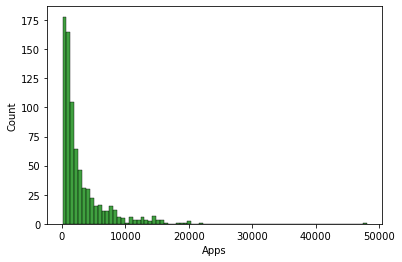



BoxPlot of Apps




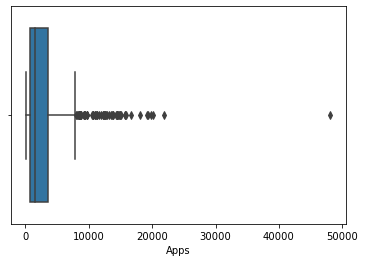

Description of Accept


count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 

Distribution of Accept




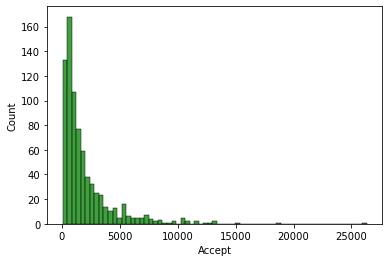



BoxPlot of Accept




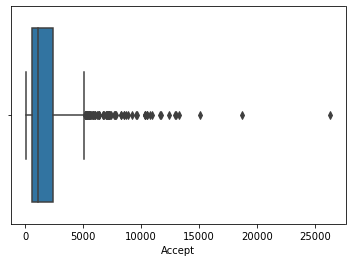

Description of Enroll


count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 

Distribution of Enroll




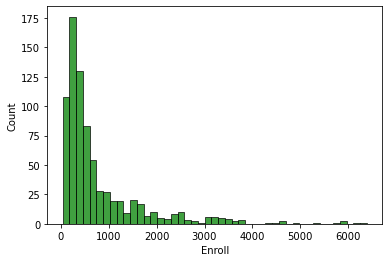



BoxPlot of Enroll




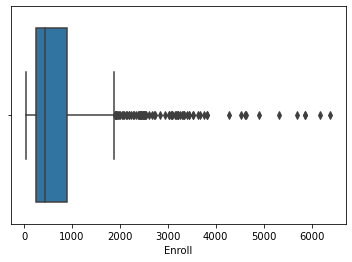

Description of Top10perc


count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 

Distribution of Top10perc




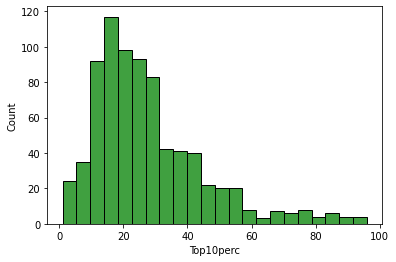



BoxPlot of Top10perc




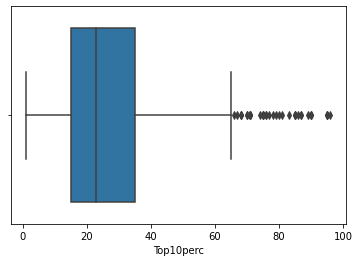

Description of Top25perc


count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 

Distribution of Top25perc




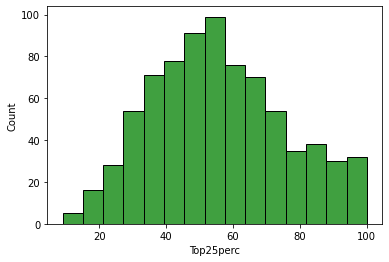



BoxPlot of Top25perc




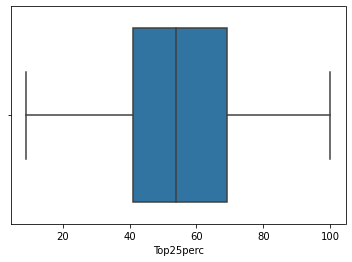

Description of F.Undergrad


count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 

Distribution of F.Undergrad




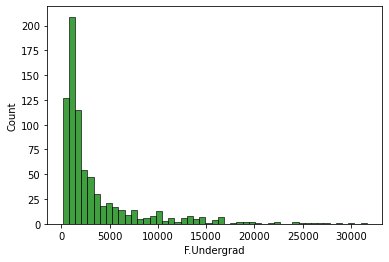



BoxPlot of F.Undergrad




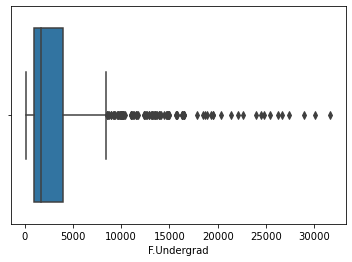

Description of P.Undergrad


count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 

Distribution of P.Undergrad




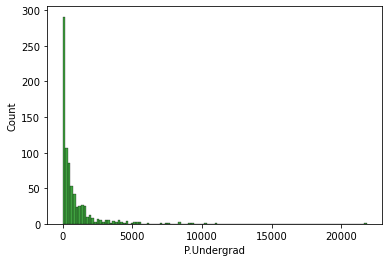



BoxPlot of P.Undergrad




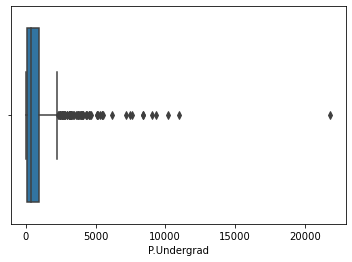

Description of Outstate


count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 

Distribution of Outstate




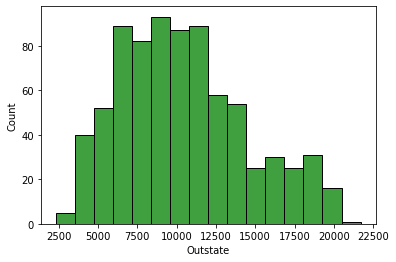



BoxPlot of Outstate




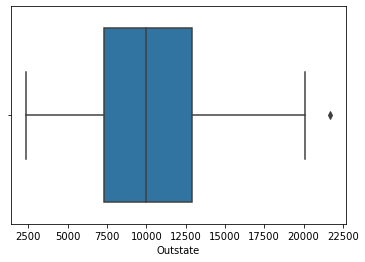

Description of Room.Board


count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 

Distribution of Room.Board




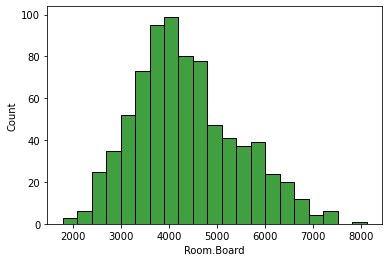



BoxPlot of Room.Board




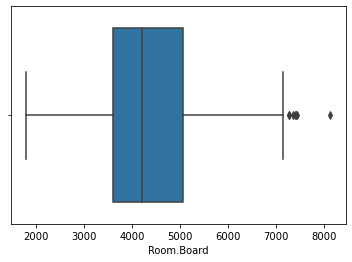

Description of Books


count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 

Distribution of Books




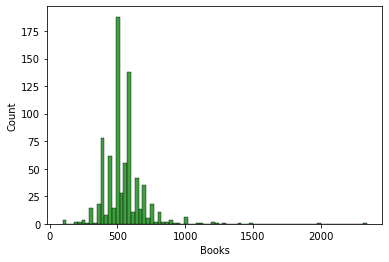



BoxPlot of Books




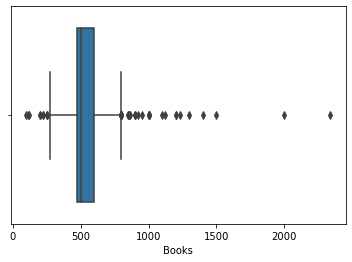

Description of Personal


count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 

Distribution of Personal




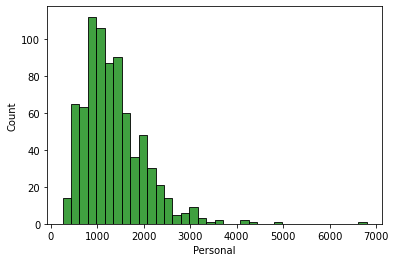



BoxPlot of Personal




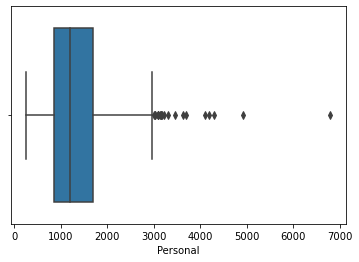

Description of PhD


count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 

Distribution of PhD




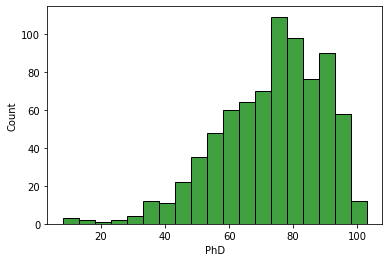



BoxPlot of PhD




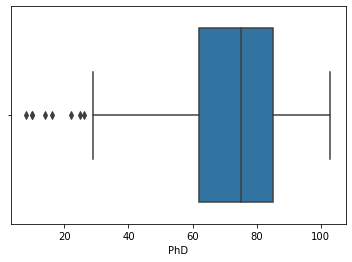

Description of Terminal


count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 

Distribution of Terminal




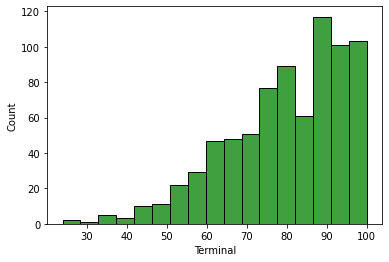



BoxPlot of Terminal




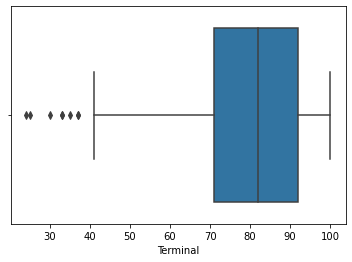

Description of S.F.Ratio


count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 

Distribution of S.F.Ratio




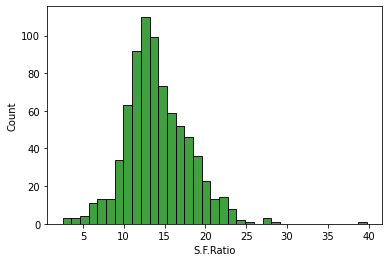



BoxPlot of S.F.Ratio




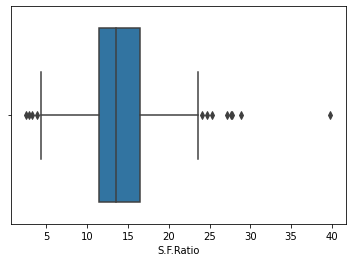

Description of perc.alumni


count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 

Distribution of perc.alumni




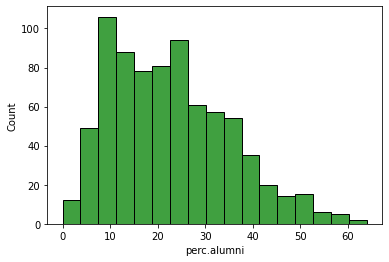



BoxPlot of perc.alumni




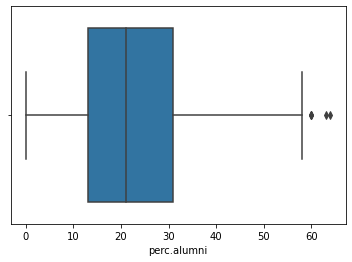

Description of Expend


count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 

Distribution of Expend




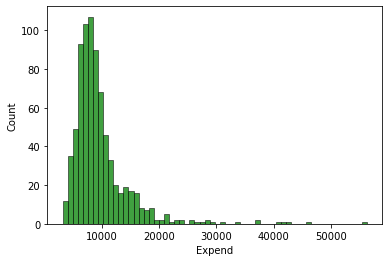



BoxPlot of Expend




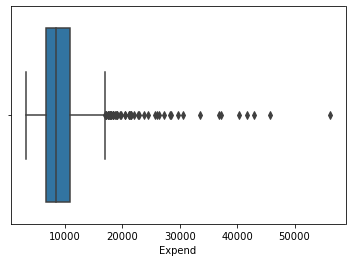

Description of Grad.Rate


count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 

Distribution of Grad.Rate




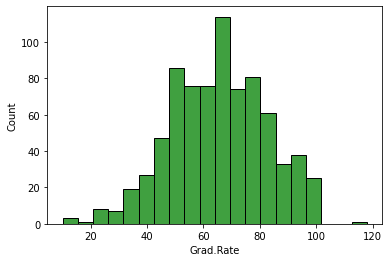



BoxPlot of Grad.Rate




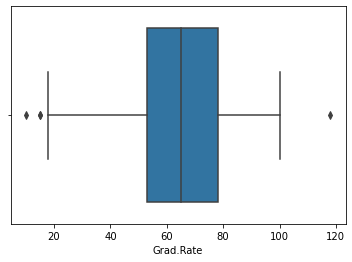

In [61]:
for x in numericcolumns:
    univariate_Analysis_numeric(x,20)

Distribution & Boxplot of Apps
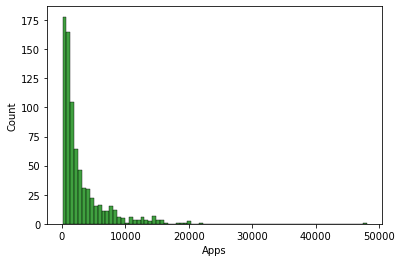
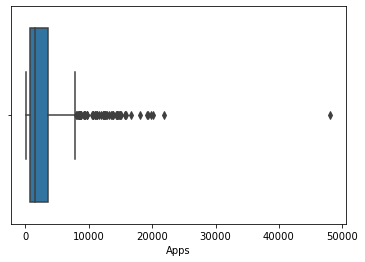
Distribution & Boxplot of Accept
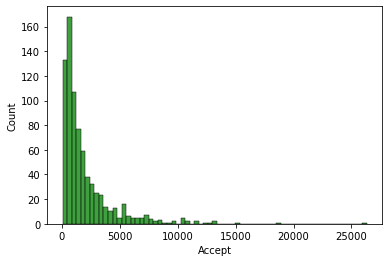
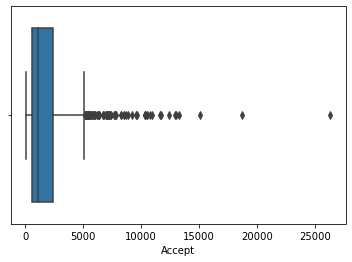
Distribution & Boxplot of Enroll
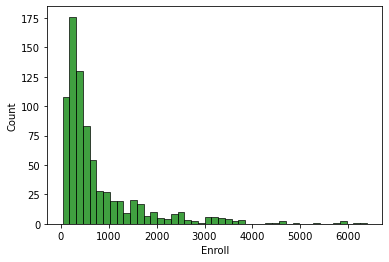
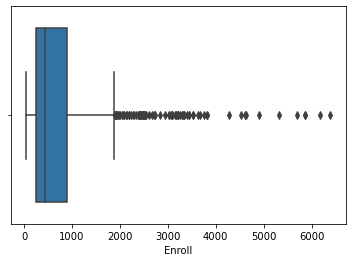
Distribution & Boxplot of Top10perc
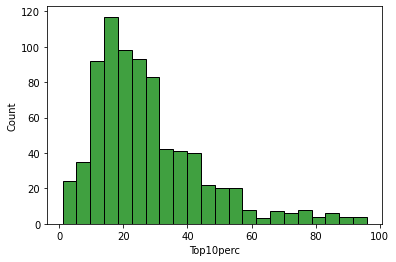
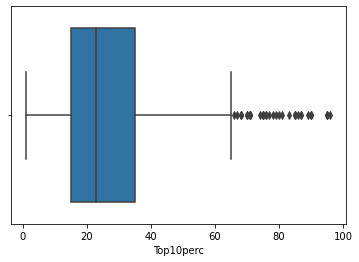
Distribution & Boxplot of Top25perc
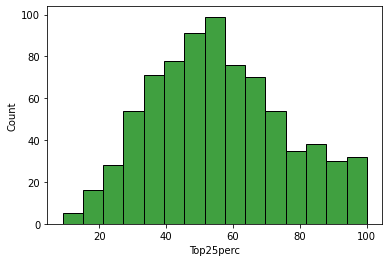
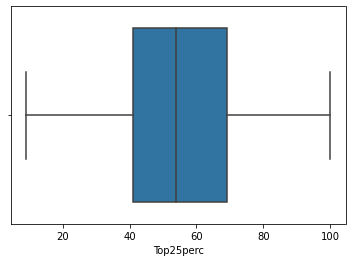
Distribution & Boxplot of F.Undergrad
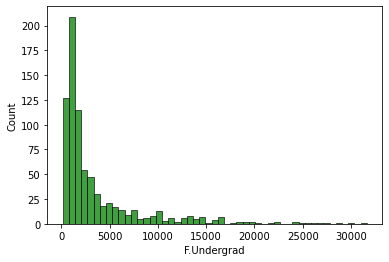
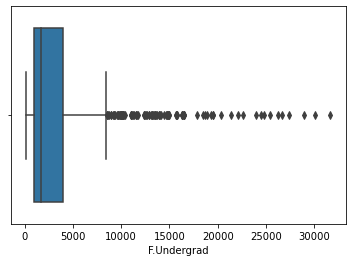
Distribution & Boxplot of P.Undergrad
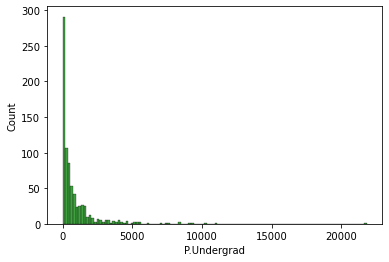
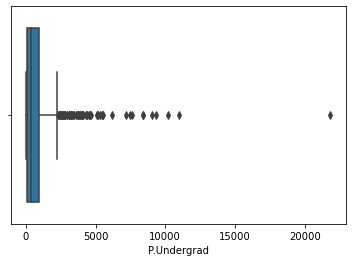
Distribution & Boxplot of Outstate
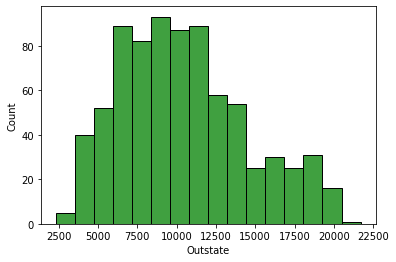
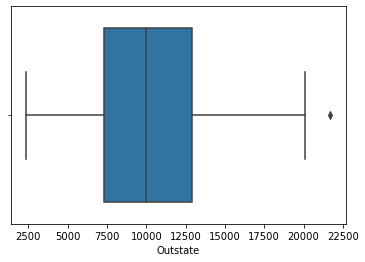
Distribution & Boxplot of Room.Board
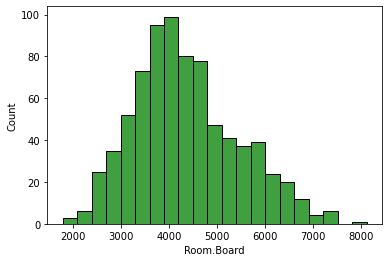
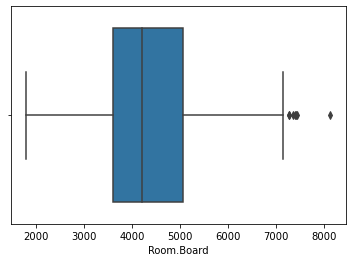
Distribution & Boxplot of Books
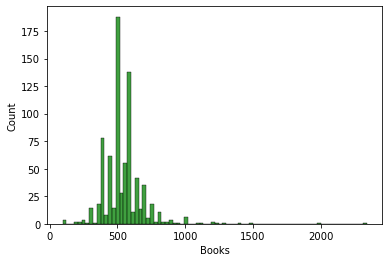
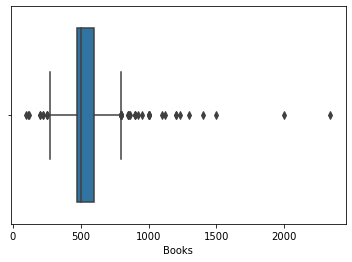
Distribution & Boxplot of Personal
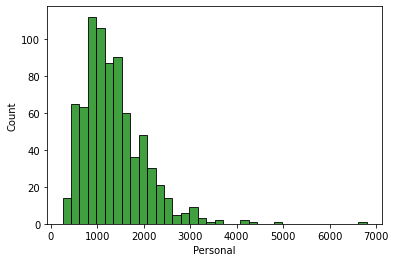
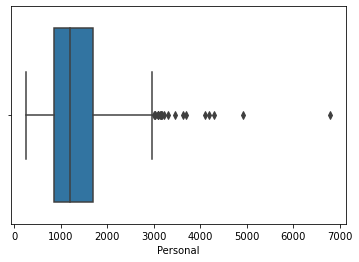
Distribution & Boxplot of PhD
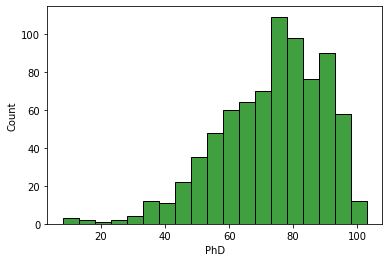
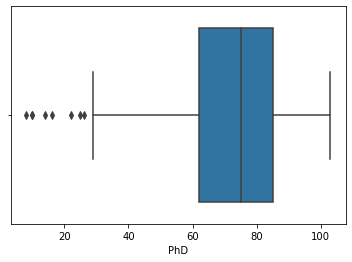
Distribution & Boxplot of Terminal
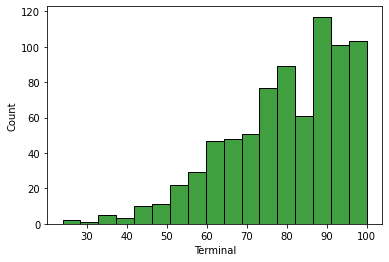
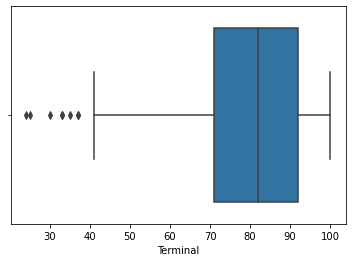
Distribution & Boxplot of S.F.Ratio
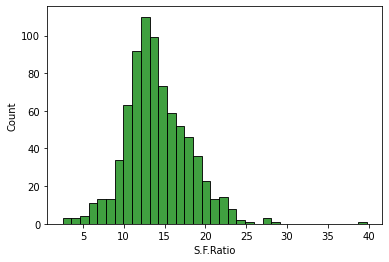
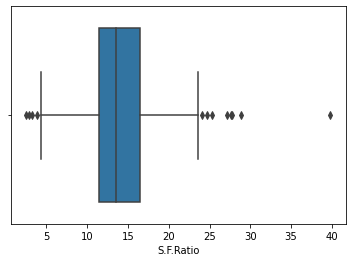
Distribution & Boxplot of perc.alumni
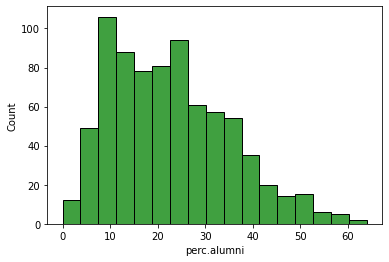
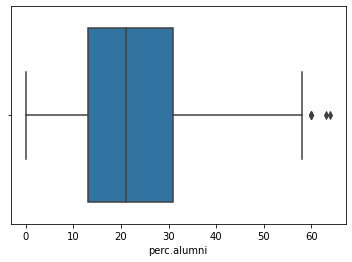
Distribution & Boxplot of Expend
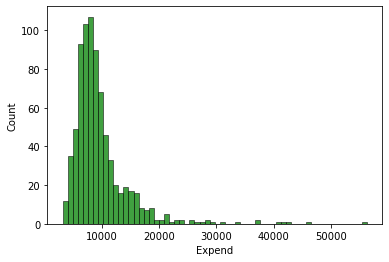
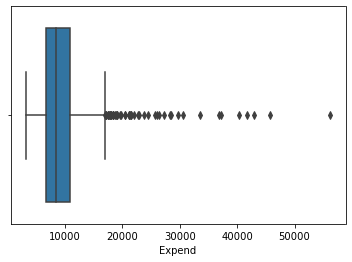
Distribution & Boxplot of Grad.Rate
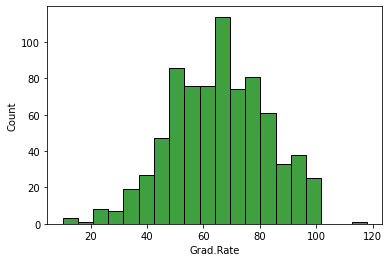
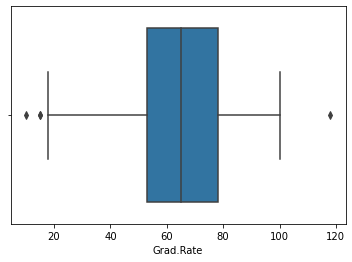

In [62]:
corr = edu_num.corr(method='pearson')

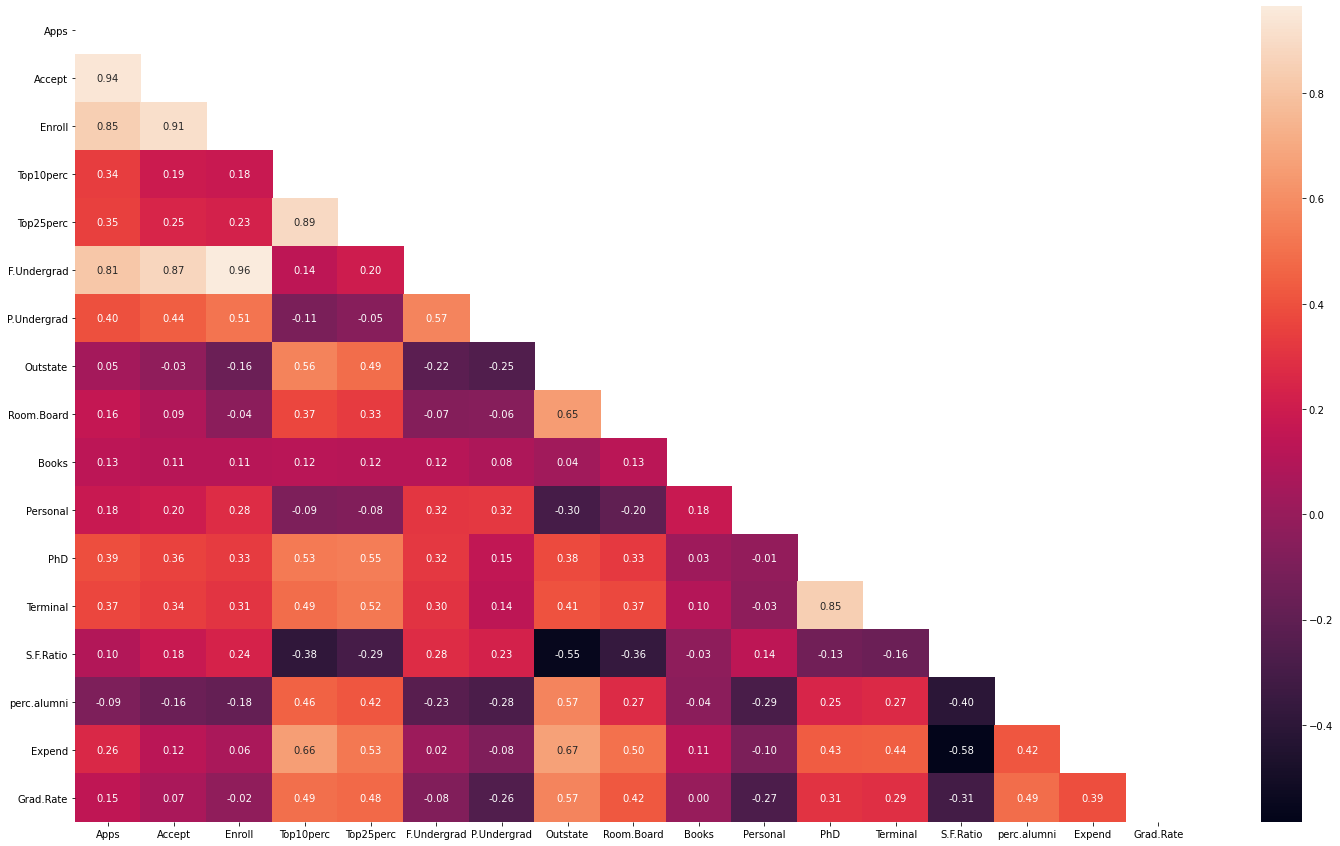

In [63]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(edu_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

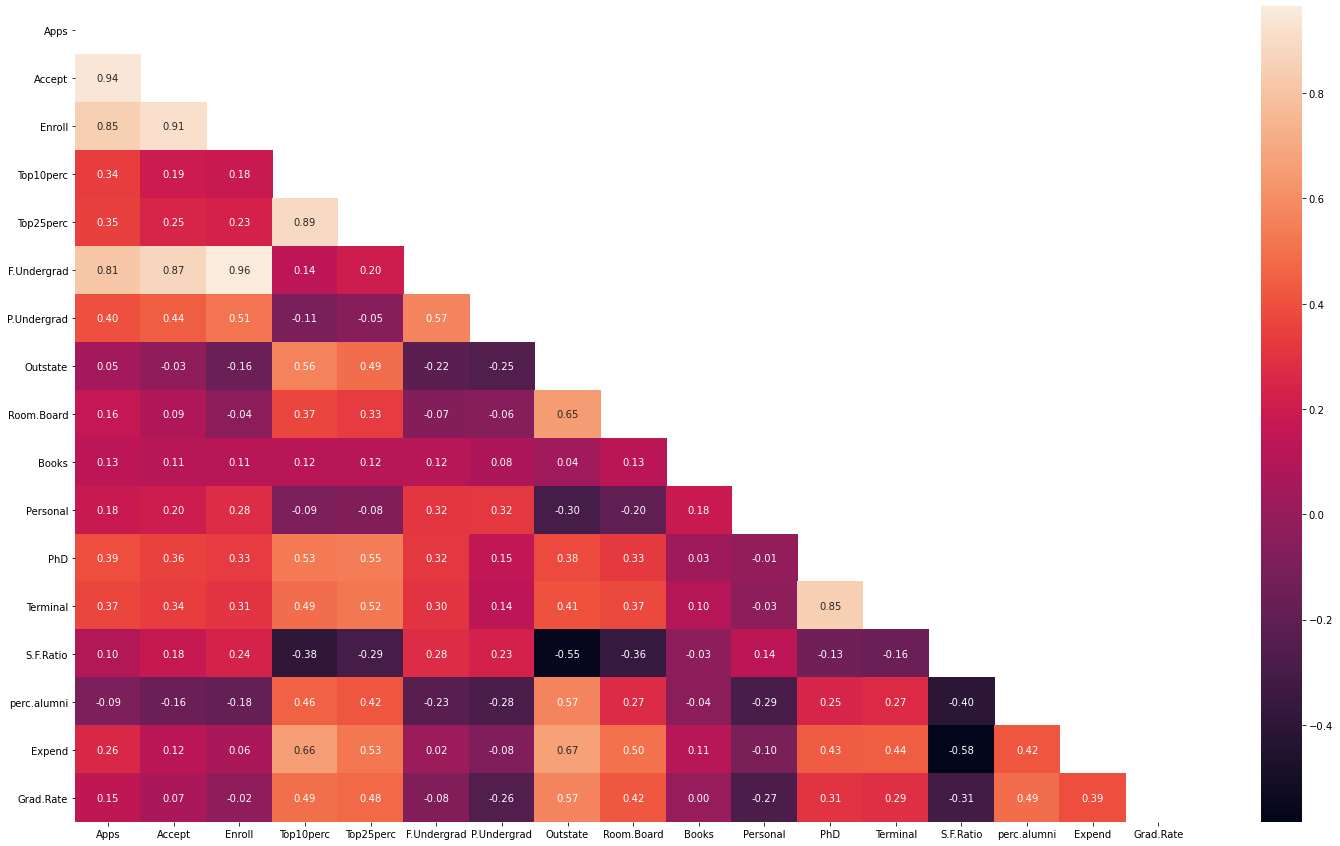

Heat Map which shows Corelation of numeric variables with other numeric variables

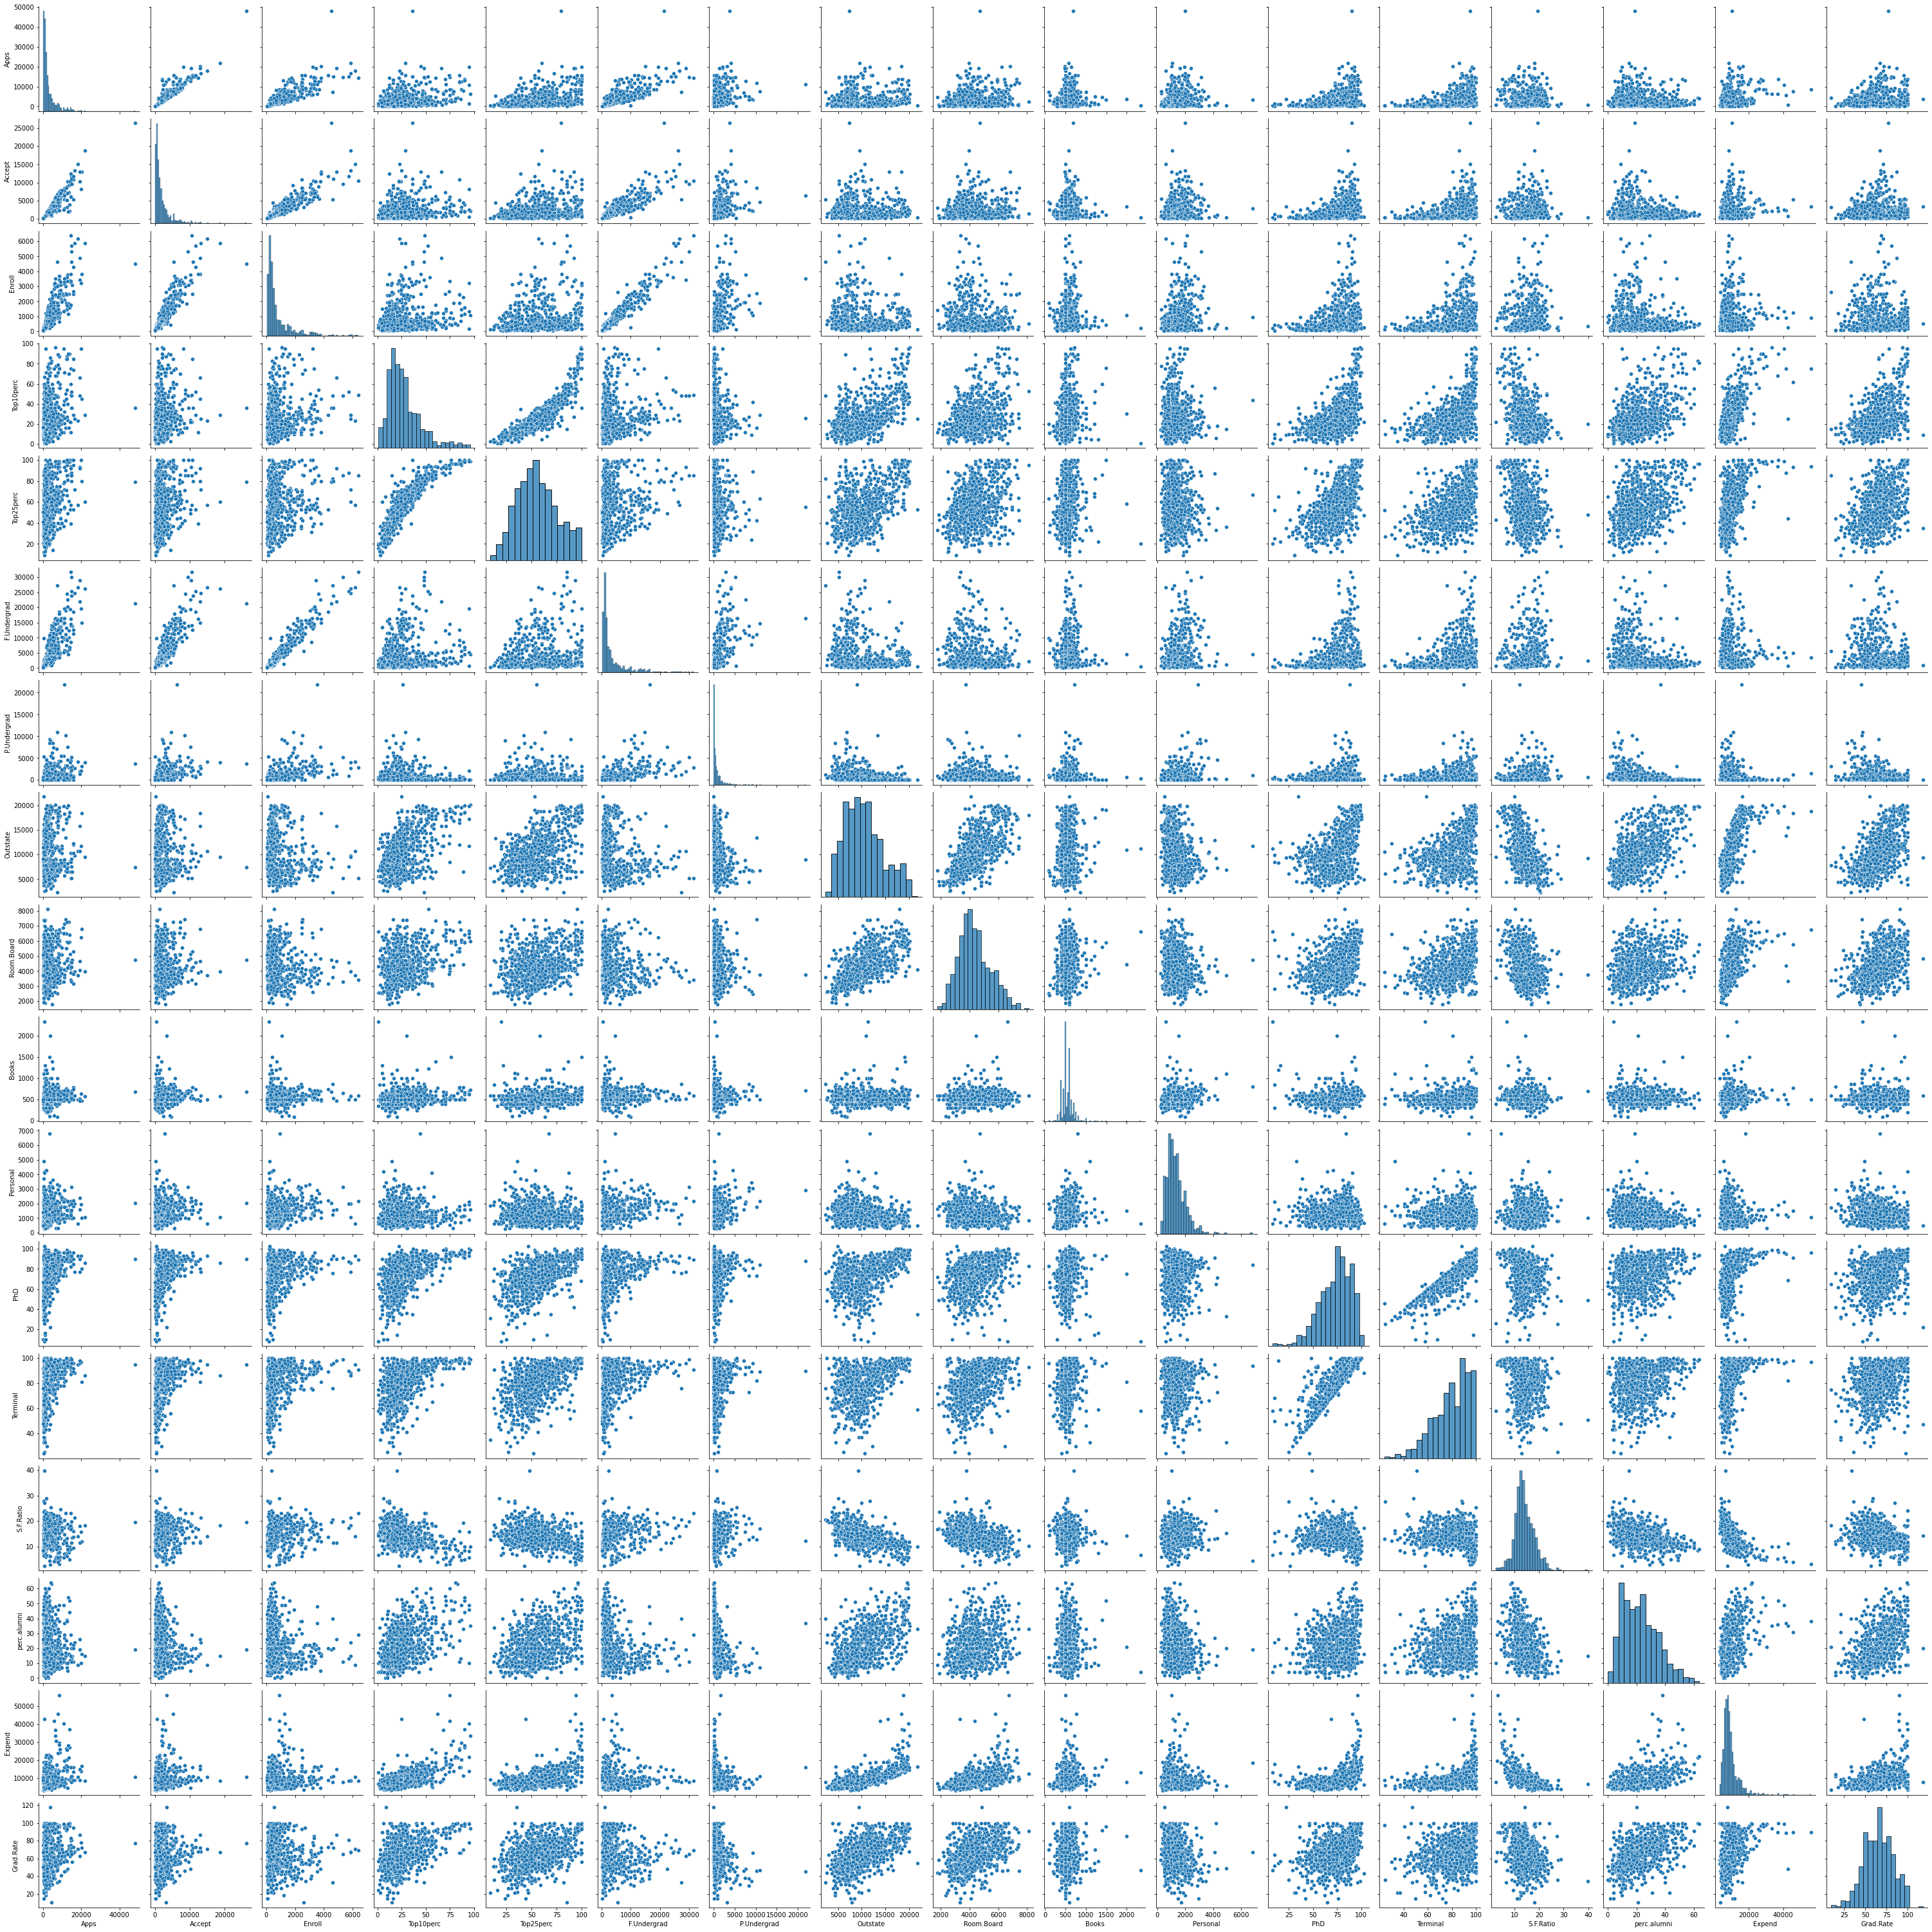

In [64]:
sns.pairplot(data=edu_num);

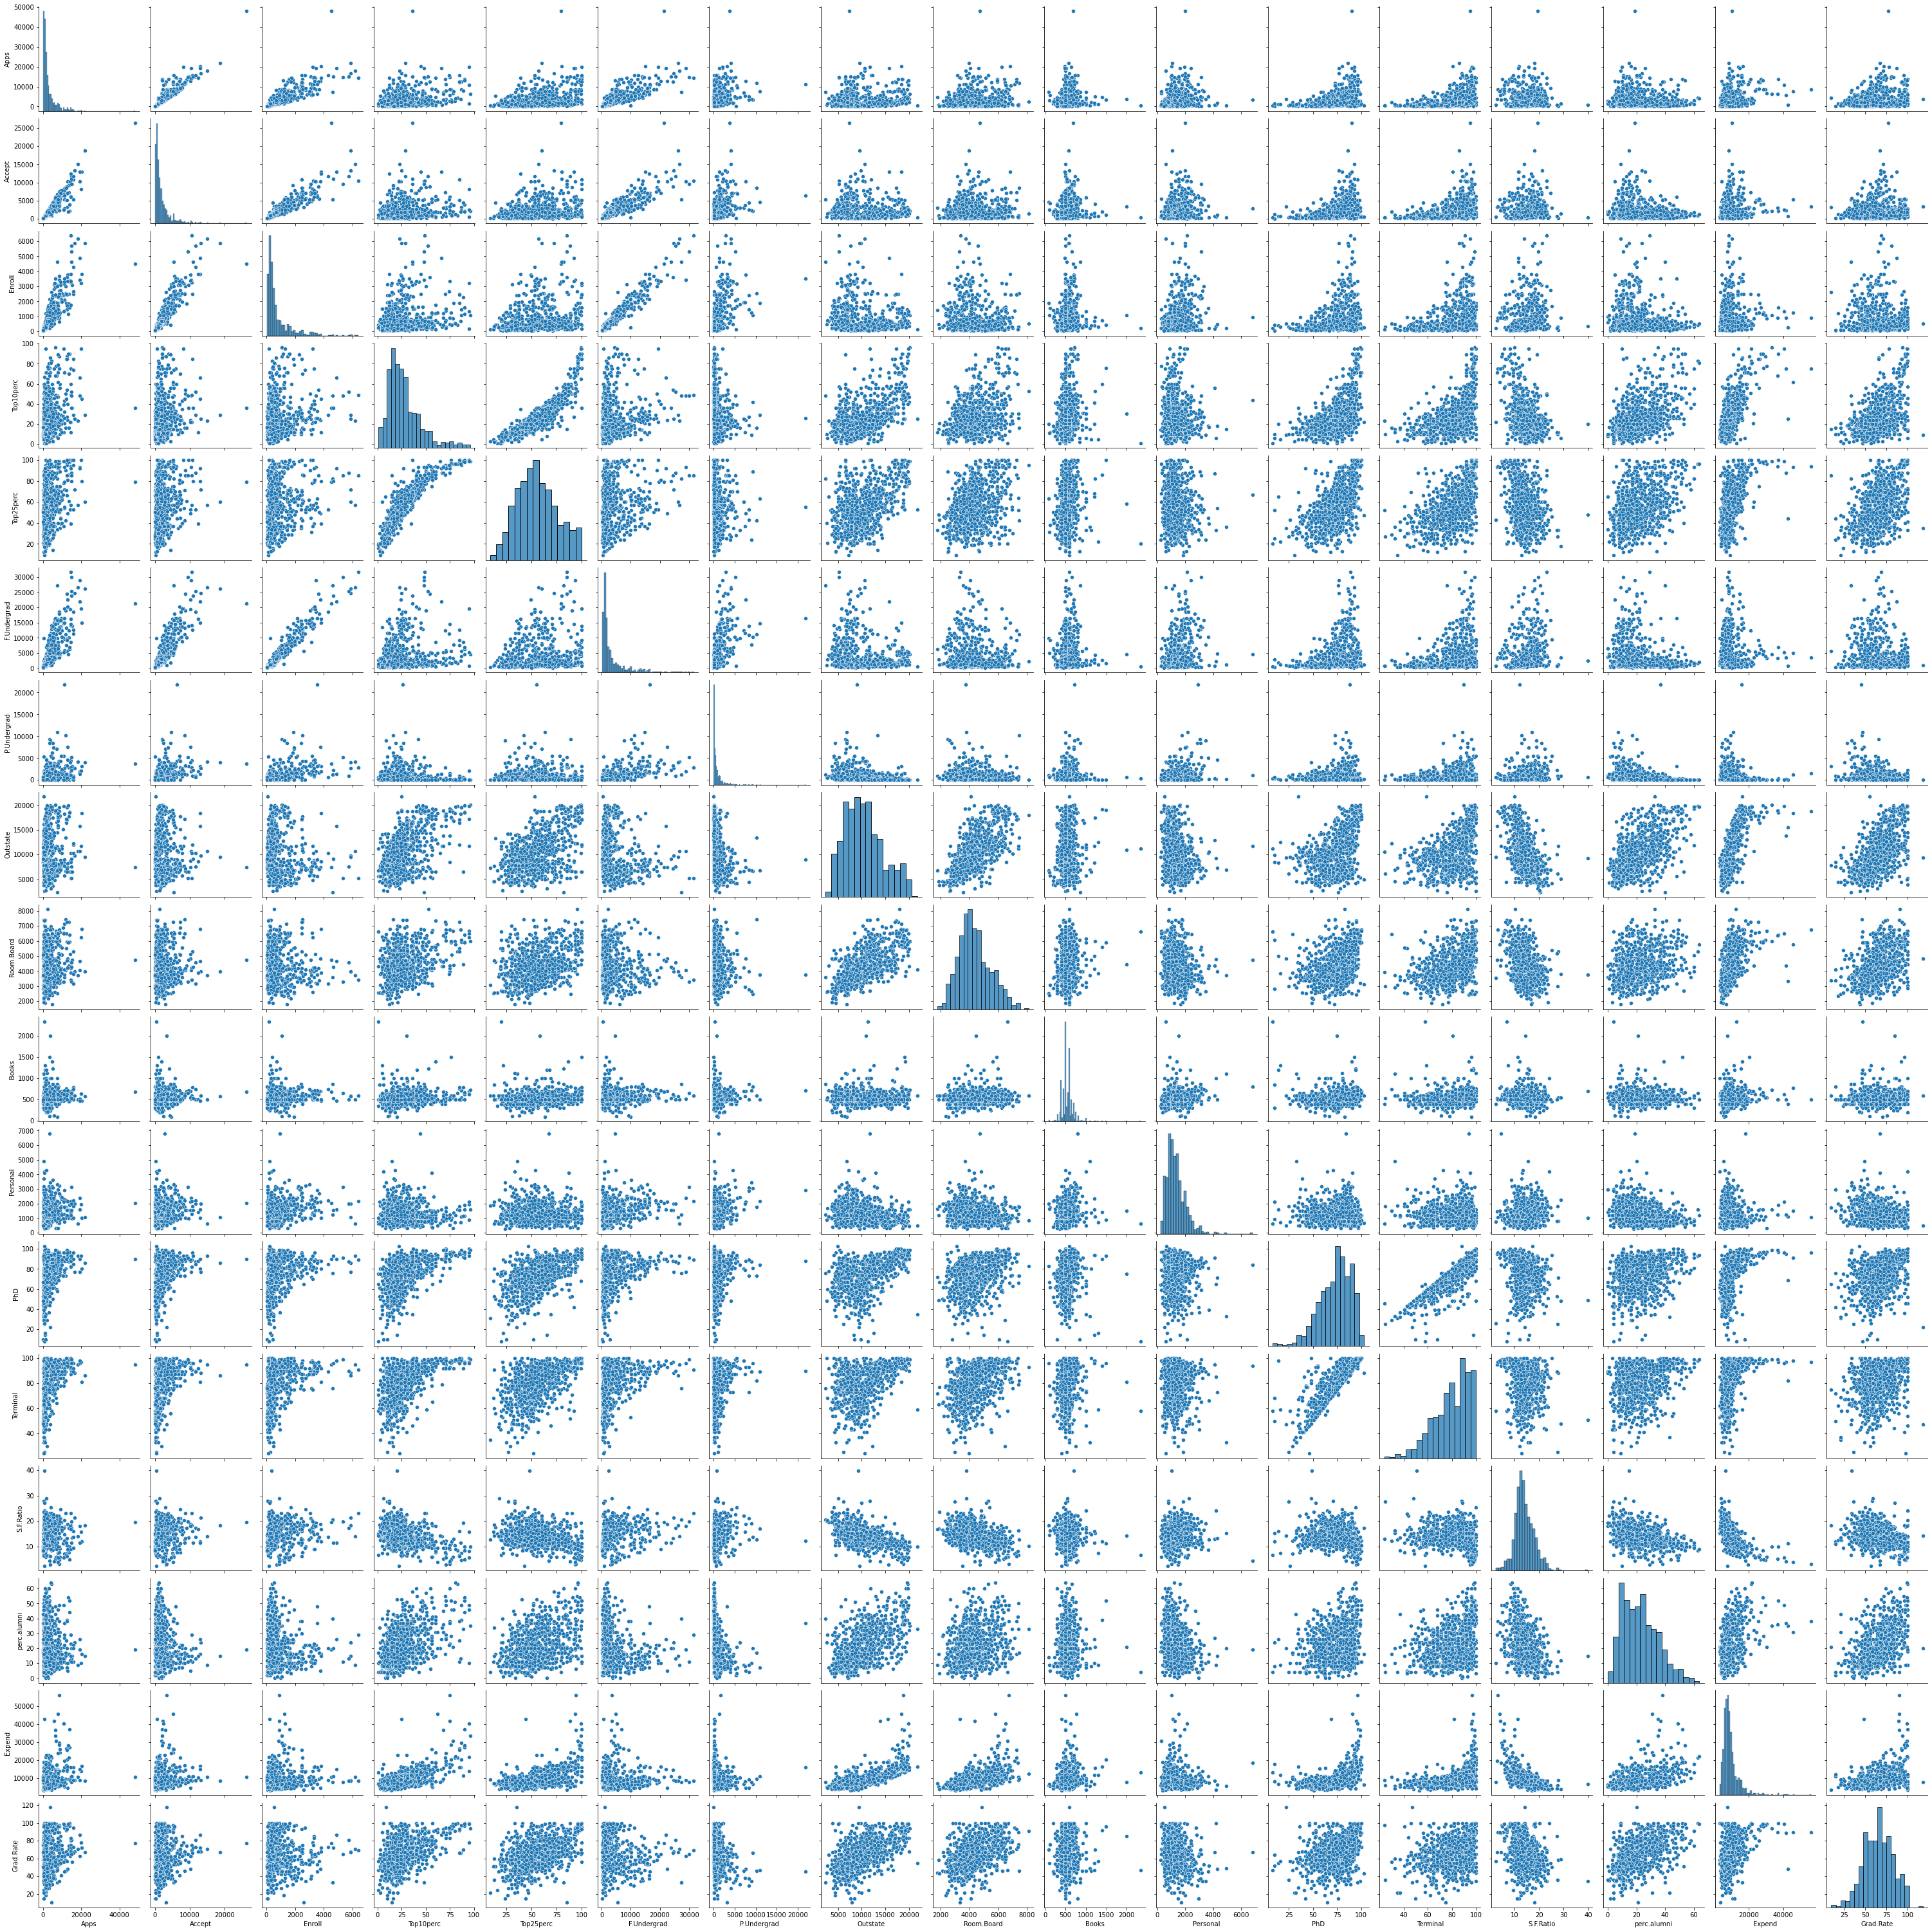

Pair Plot of numeric variables with other numeric variables

### 2.2. Is scaling necessary for PCA in this case? Give justification and perform scaling.

Scaling is necessary in this case as Dataset has features with different "weights".

Here we will be using Z-score Scaling Method

In [65]:
numericcolumns

['Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

In [66]:
from scipy.stats import zscore
edu_scaled=edu_num[numericcolumns].apply(zscore)

In [67]:
edu_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

||Apps                        |Accept|Enroll|Top10perc|Top25perc|F.Undergrad|P.Undergrad|Outstate|Room.Board|Books    |Personal |PhD      |Terminal |S.F.Ratio|perc.alumni|Expend   |Grad.Rate|
|------|-------|------|------|---------|---------|-----------|-----------|--------|----------|---------|---------|---------|---------|---------|-----------|---------|---------|
|0     |-0.346882                   |-0.321205|-0.063509|-0.258583|-0.191827|-0.168116  |-0.209207  |-0.746356|-0.964905 |-0.602312|1.270045 |-0.163028|-0.115729|1.013776 |-0.867574  |-0.501910|-0.318252|
|1     |-0.210884                   |-0.038703|-0.288584|-0.655656|-1.353911|-0.209788  |0.244307   |0.457496|1.909208  |1.215880 |0.235515 |-2.675646|-3.378176|-0.477704|-0.544572  |0.166110 |-0.551262|
|2     |-0.406866                   |-0.376318|-0.478121|-0.315307|-0.292878|-0.549565  |-0.497090  |0.201305|-0.554317 |-0.905344|-0.259582|-1.204845|-0.931341|-0.300749|0.585935   |-0.177290|-0.667767|
|3     |-0.668261                   |-0.681682|-0.692427|1.840231 |1.677612 |-0.658079  |-0.520752  |0.626633|0.996791  |-0.602312|-0.688173|1.185206 |1.175657 |-1.615274|1.151188   |1.792851 |-0.376504|
|4     |-0.726176                   |-0.764555|-0.780735|-0.655656|-0.596031|-0.711924  |0.009005   |-0.716508|-0.216723 |1.518912 |0.235515 |0.204672 |-0.523535|-0.553542|-1.675079  |0.241803 |-2.939613|


Scaled Dataset is as shown above

### 2.3. Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated


In [68]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(edu_scaled)
p_value

0.0

P value is 0.0, p-value is small. We can reject the null hypothesis and agree that there is atleast one pair of variables in the data wihich are correlated hence PCA is recommended.

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.


In [69]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(edu_scaled)
kmo_model

0.8131251200373522

MSA = 0.8131251200373522 is greater than 0.5 & MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components. Hence PCA is recommended.

In [70]:
np.round(edu_scaled.cov(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.94    0.85       0.34       0.35         0.82   
Accept       0.94    1.00    0.91       0.19       0.25         0.88   
Enroll       0.85    0.91    1.00       0.18       0.23         0.97   
Top10perc    0.34    0.19    0.18       1.00       0.89         0.14   
Top25perc    0.35    0.25    0.23       0.89       1.00         0.20   
F.Undergrad  0.82    0.88    0.97       0.14       0.20         1.00   
P.Undergrad  0.40    0.44    0.51      -0.11      -0.05         0.57   
Outstate     0.05   -0.03   -0.16       0.56       0.49        -0.22   
Room.Board   0.17    0.09   -0.04       0.37       0.33        -0.07   
Books        0.13    0.11    0.11       0.12       0.12         0.12   
Personal     0.18    0.20    0.28      -0.09      -0.08         0.32   
PhD          0.39    0.36    0.33       0.53       0.55         0.32   
Terminal     0.37    0.34    0.31       0.49       0.53         0.30   
S.F.Ratio    0.10    0.18    0.24      -0.39      -0.30         0.28   
perc.alumni -0.09   -0.16   -0.18       0.46       0.42        -0.23   
Expend       0.26    0.12    0.06       0.66       0.53         0.02   
Grad.Rate    0.15    0.07   -0.02       0.50       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.40      0.05        0.17   0.13      0.18  0.39   
Accept              0.44     -0.03        0.09   0.11      0.20  0.36   
Enroll              0.51     -0.16       -0.04   0.11      0.28  0.33   
Top10perc          -0.11      0.56        0.37   0.12     -0.09  0.53   
Top25perc          -0.05      0.49        0.33   0.12     -0.08  0.55   
F.Undergrad         0.57     -0.22       -0.07   0.12      0.32  0.32   
P.Undergrad         1.00     -0.25       -0.06   0.08      0.32  0.15   
Outstate           -0.25      1.00        0.66   0.04     -0.30  0.38   
Room.Board         -0.06      0.66        1.00   0.13     -0.20  0.33   
Books               0.08      0.04        0.13   1.00      0.18  0.03   
Personal            0.32     -0.30       -0.20   0.18      1.00 -0.01   
PhD                 0.15      0.38        0.33   0.03     -0.01  1.00   
Terminal            0.14      0.41        0.38   0.10     -0.03  0.85   
S.F.Ratio           0.23     -0.56       -0.36  -0.03      0.14 -0.13   
perc.alumni        -0.28      0.57        0.27  -0.04     -0.29  0.25   
Expend             -0.08      0.67        0.50   0.11     -0.10  0.43   
Grad.Rate          -0.26      0.57        0.43   0.00     -0.27  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.37       0.10        -0.09    0.26       0.15  
Accept           0.34       0.18        -0.16    0.12       0.07  
Enroll           0.31       0.24        -0.18    0.06      -0.02  
Top10perc        0.49      -0.39         0.46    0.66       0.50  
Top25perc        0.53      -0.30         0.42    0.53       0.48  
F.Undergrad      0.30       0.28        -0.23    0.02      -0.08  
P.Undergrad      0.14       0.23        -0.28   -0.08      -0.26  
Outstate         0.41      -0.56         0.57    0.67       0.57  
Room.Board       0.38      -0.36         0.27    0.50       0.43  
Books            0.10      -0.03        -0.04    0.11       0.00  
Personal        -0.03       0.14        -0.29   -0.10      -0.27  
PhD              0.85      -0.13         0.25    0.43       0.31  
Terminal         1.00      -0.16         0.27    0.44       0.29  
S.F.Ratio       -0.16       1.00        -0.40   -0.58      -0.31  
perc.alumni      0.27      -0.40         1.00    0.42       0.49  
Expend           0.44      -0.58         0.42    1.00       0.39  
Grad.Rate        0.29      -0.31         0.49    0.39       1.00

||Apps                        |Accept|Enroll|Top10perc|Top25perc|F.Undergrad|P.Undergrad|Outstate|Room.Board|Books    |Personal |PhD      |Terminal |S.F.Ratio|perc.alumni|Expend   |Grad.Rate|
|------|----------------------------|------|------|---------|---------|-----------|-----------|--------|----------|---------|---------|---------|---------|---------|-----------|---------|---------|
|Apps  |1.00                        |0.94  |0.85  |0.34     |0.35     |0.82       |0.40       |0.05    |0.17      |0.13     |0.18     |0.39     |0.37     |0.10     |-0.09      |0.26     |0.15     |
|Accept|0.94                        |1.00  |0.91  |0.19     |0.25     |0.88       |0.44       |-0.03   |0.09      |0.11     |0.20     |0.36     |0.34     |0.18     |-0.16      |0.12     |0.07     |
|Enroll|0.85                        |0.91  |1.00  |0.18     |0.23     |0.97       |0.51       |-0.16   |-0.04     |0.11     |0.28     |0.33     |0.31     |0.24     |-0.18      |0.06     |-0.02    |
|Top10perc|0.34                        |0.19  |0.18  |1.00     |0.89     |0.14       |-0.11      |0.56    |0.37      |0.12     |-0.09    |0.53     |0.49     |-0.39    |0.46       |0.66     |0.50     |
|Top25perc|0.35                        |0.25  |0.23  |0.89     |1.00     |0.20       |-0.05      |0.49    |0.33      |0.12     |-0.08    |0.55     |0.53     |-0.30    |0.42       |0.53     |0.48     |
|F.Undergrad|0.82                        |0.88  |0.97  |0.14     |0.20     |1.00       |0.57       |-0.22   |-0.07     |0.12     |0.32     |0.32     |0.30     |0.28     |-0.23      |0.02     |-0.08    |
|P.Undergrad|0.40                        |0.44  |0.51  |-0.11    |-0.05    |0.57       |1.00       |-0.25   |-0.06     |0.08     |0.32     |0.15     |0.14     |0.23     |-0.28      |-0.08    |-0.26    |
|Outstate|0.05                        |-0.03 |-0.16 |0.56     |0.49     |-0.22      |-0.25      |1.00    |0.66      |0.04     |-0.30    |0.38     |0.41     |-0.56    |0.57       |0.67     |0.57     |
|Room.Board|0.17                        |0.09  |-0.04 |0.37     |0.33     |-0.07      |-0.06      |0.66    |1.00      |0.13     |-0.20    |0.33     |0.38     |-0.36    |0.27       |0.50     |0.43     |
|Books |0.13                        |0.11  |0.11  |0.12     |0.12     |0.12       |0.08       |0.04    |0.13      |1.00     |0.18     |0.03     |0.10     |-0.03    |-0.04      |0.11     |0.00     |
|Personal|0.18                        |0.20  |0.28  |-0.09    |-0.08    |0.32       |0.32       |-0.30   |-0.20     |0.18     |1.00     |-0.01    |-0.03    |0.14     |-0.29      |-0.10    |-0.27    |
|PhD   |0.39                        |0.36  |0.33  |0.53     |0.55     |0.32       |0.15       |0.38    |0.33      |0.03     |-0.01    |1.00     |0.85     |-0.13    |0.25       |0.43     |0.31     |
|Terminal|0.37                        |0.34  |0.31  |0.49     |0.53     |0.30       |0.14       |0.41    |0.38      |0.10     |-0.03    |0.85     |1.00     |-0.16    |0.27       |0.44     |0.29     |
|S.F.Ratio|0.10                        |0.18  |0.24  |-0.39    |-0.30    |0.28       |0.23       |-0.56   |-0.36     |-0.03    |0.14     |-0.13    |-0.16    |1.00     |-0.40      |-0.58    |-0.31    |
|perc.alumni|-0.09                       |-0.16 |-0.18 |0.46     |0.42     |-0.23      |-0.28      |0.57    |0.27      |-0.04    |-0.29    |0.25     |0.27     |-0.40    |1.00       |0.42     |0.49     |
|Expend|0.26                        |0.12  |0.06  |0.66     |0.53     |0.02       |-0.08      |0.67    |0.50      |0.11     |-0.10    |0.43     |0.44     |-0.58    |0.42       |1.00     |0.39     |
|Grad.Rate|0.15                        |0.07  |-0.02 |0.50     |0.48     |-0.08      |-0.26      |0.57    |0.43      |0.00     |-0.27    |0.31     |0.29     |-0.31    |0.49       |0.39     |1.00     |


Variance-Covariance Matrix of the Scaled Data

In [71]:
np.round(edu_scaled.corr(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.94    0.85       0.34       0.35         0.81   
Accept       0.94    1.00    0.91       0.19       0.25         0.87   
Enroll       0.85    0.91    1.00       0.18       0.23         0.96   
Top10perc    0.34    0.19    0.18       1.00       0.89         0.14   
Top25perc    0.35    0.25    0.23       0.89       1.00         0.20   
F.Undergrad  0.81    0.87    0.96       0.14       0.20         1.00   
P.Undergrad  0.40    0.44    0.51      -0.11      -0.05         0.57   
Outstate     0.05   -0.03   -0.16       0.56       0.49        -0.22   
Room.Board   0.16    0.09   -0.04       0.37       0.33        -0.07   
Books        0.13    0.11    0.11       0.12       0.12         0.12   
Personal     0.18    0.20    0.28      -0.09      -0.08         0.32   
PhD          0.39    0.36    0.33       0.53       0.55         0.32   
Terminal     0.37    0.34    0.31       0.49       0.52         0.30   
S.F.Ratio    0.10    0.18    0.24      -0.38      -0.29         0.28   
perc.alumni -0.09   -0.16   -0.18       0.46       0.42        -0.23   
Expend       0.26    0.12    0.06       0.66       0.53         0.02   
Grad.Rate    0.15    0.07   -0.02       0.49       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.40      0.05        0.16   0.13      0.18  0.39   
Accept              0.44     -0.03        0.09   0.11      0.20  0.36   
Enroll              0.51     -0.16       -0.04   0.11      0.28  0.33   
Top10perc          -0.11      0.56        0.37   0.12     -0.09  0.53   
Top25perc          -0.05      0.49        0.33   0.12     -0.08  0.55   
F.Undergrad         0.57     -0.22       -0.07   0.12      0.32  0.32   
P.Undergrad         1.00     -0.25       -0.06   0.08      0.32  0.15   
Outstate           -0.25      1.00        0.65   0.04     -0.30  0.38   
Room.Board         -0.06      0.65        1.00   0.13     -0.20  0.33   
Books               0.08      0.04        0.13   1.00      0.18  0.03   
Personal            0.32     -0.30       -0.20   0.18      1.00 -0.01   
PhD                 0.15      0.38        0.33   0.03     -0.01  1.00   
Terminal            0.14      0.41        0.37   0.10     -0.03  0.85   
S.F.Ratio           0.23     -0.55       -0.36  -0.03      0.14 -0.13   
perc.alumni        -0.28      0.57        0.27  -0.04     -0.29  0.25   
Expend             -0.08      0.67        0.50   0.11     -0.10  0.43   
Grad.Rate          -0.26      0.57        0.42   0.00     -0.27  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.37       0.10        -0.09    0.26       0.15  
Accept           0.34       0.18        -0.16    0.12       0.07  
Enroll           0.31       0.24        -0.18    0.06      -0.02  
Top10perc        0.49      -0.38         0.46    0.66       0.49  
Top25perc        0.52      -0.29         0.42    0.53       0.48  
F.Undergrad      0.30       0.28        -0.23    0.02      -0.08  
P.Undergrad      0.14       0.23        -0.28   -0.08      -0.26  
Outstate         0.41      -0.55         0.57    0.67       0.57  
Room.Board       0.37      -0.36         0.27    0.50       0.42  
Books            0.10      -0.03        -0.04    0.11       0.00  
Personal        -0.03       0.14        -0.29   -0.10      -0.27  
PhD              0.85      -0.13         0.25    0.43       0.31  
Terminal         1.00      -0.16         0.27    0.44       0.29  
S.F.Ratio       -0.16       1.00        -0.40   -0.58      -0.31  
perc.alumni      0.27      -0.40         1.00    0.42       0.49  
Expend           0.44      -0.58         0.42    1.00       0.39  
Grad.Rate        0.29      -0.31         0.49    0.39       1.00

||Apps                        |Accept|Enroll|Top10perc|Top25perc|F.Undergrad|P.Undergrad|Outstate|Room.Board|Books    |Personal |PhD      |Terminal |S.F.Ratio|perc.alumni|Expend   |Grad.Rate|
|------|----------------------------|------|------|---------|---------|-----------|-----------|--------|----------|---------|---------|---------|---------|---------|-----------|---------|---------|
|Apps  |1.00                        |0.94  |0.85  |0.34     |0.35     |0.81       |0.40       |0.05    |0.16      |0.13     |0.18     |0.39     |0.37     |0.10     |-0.09      |0.26     |0.15     |
|Accept|0.94                        |1.00  |0.91  |0.19     |0.25     |0.87       |0.44       |-0.03   |0.09      |0.11     |0.20     |0.36     |0.34     |0.18     |-0.16      |0.12     |0.07     |
|Enroll|0.85                        |0.91  |1.00  |0.18     |0.23     |0.96       |0.51       |-0.16   |-0.04     |0.11     |0.28     |0.33     |0.31     |0.24     |-0.18      |0.06     |-0.02    |
|Top10perc|0.34                        |0.19  |0.18  |1.00     |0.89     |0.14       |-0.11      |0.56    |0.37      |0.12     |-0.09    |0.53     |0.49     |-0.38    |0.46       |0.66     |0.49     |
|Top25perc|0.35                        |0.25  |0.23  |0.89     |1.00     |0.20       |-0.05      |0.49    |0.33      |0.12     |-0.08    |0.55     |0.52     |-0.29    |0.42       |0.53     |0.48     |
|F.Undergrad|0.81                        |0.87  |0.96  |0.14     |0.20     |1.00       |0.57       |-0.22   |-0.07     |0.12     |0.32     |0.32     |0.30     |0.28     |-0.23      |0.02     |-0.08    |
|P.Undergrad|0.40                        |0.44  |0.51  |-0.11    |-0.05    |0.57       |1.00       |-0.25   |-0.06     |0.08     |0.32     |0.15     |0.14     |0.23     |-0.28      |-0.08    |-0.26    |
|Outstate|0.05                        |-0.03 |-0.16 |0.56     |0.49     |-0.22      |-0.25      |1.00    |0.65      |0.04     |-0.30    |0.38     |0.41     |-0.55    |0.57       |0.67     |0.57     |
|Room.Board|0.16                        |0.09  |-0.04 |0.37     |0.33     |-0.07      |-0.06      |0.65    |1.00      |0.13     |-0.20    |0.33     |0.37     |-0.36    |0.27       |0.50     |0.42     |
|Books |0.13                        |0.11  |0.11  |0.12     |0.12     |0.12       |0.08       |0.04    |0.13      |1.00     |0.18     |0.03     |0.10     |-0.03    |-0.04      |0.11     |0.00     |
|Personal|0.18                        |0.20  |0.28  |-0.09    |-0.08    |0.32       |0.32       |-0.30   |-0.20     |0.18     |1.00     |-0.01    |-0.03    |0.14     |-0.29      |-0.10    |-0.27    |
|PhD   |0.39                        |0.36  |0.33  |0.53     |0.55     |0.32       |0.15       |0.38    |0.33      |0.03     |-0.01    |1.00     |0.85     |-0.13    |0.25       |0.43     |0.31     |
|Terminal|0.37                        |0.34  |0.31  |0.49     |0.52     |0.30       |0.14       |0.41    |0.37      |0.10     |-0.03    |0.85     |1.00     |-0.16    |0.27       |0.44     |0.29     |
|S.F.Ratio|0.10                        |0.18  |0.24  |-0.38    |-0.29    |0.28       |0.23       |-0.55   |-0.36     |-0.03    |0.14     |-0.13    |-0.16    |1.00     |-0.40      |-0.58    |-0.31    |
|perc.alumni|-0.09                       |-0.16 |-0.18 |0.46     |0.42     |-0.23      |-0.28      |0.57    |0.27      |-0.04    |-0.29    |0.25     |0.27     |-0.40    |1.00       |0.42     |0.49     |
|Expend|0.26                        |0.12  |0.06  |0.66     |0.53     |0.02       |-0.08      |0.67    |0.50      |0.11     |-0.10    |0.43     |0.44     |-0.58    |0.42       |1.00     |0.39     |
|Grad.Rate|0.15                        |0.07  |-0.02 |0.49     |0.48     |-0.08      |-0.26      |0.57    |0.42      |0.00     |-0.27    |0.31     |0.29     |-0.31    |0.49       |0.39     |1.00     |

New Correlation Matrix of the Scaled Data

We see that the Covariance Matrix and the Correlation matrix of the Scaled Data are identical to each other.

### 2.4. Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

In [72]:
edu_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [73]:
edu_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

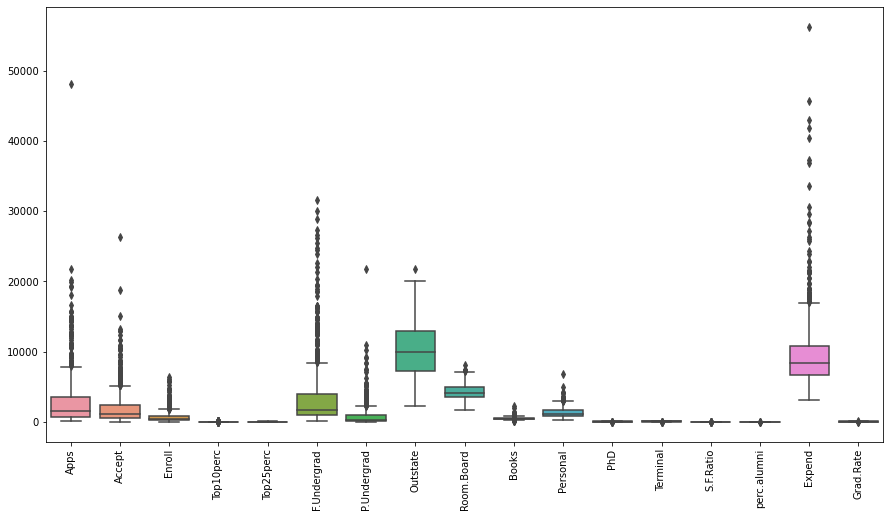

In [74]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data=edu_num)
plt.show()

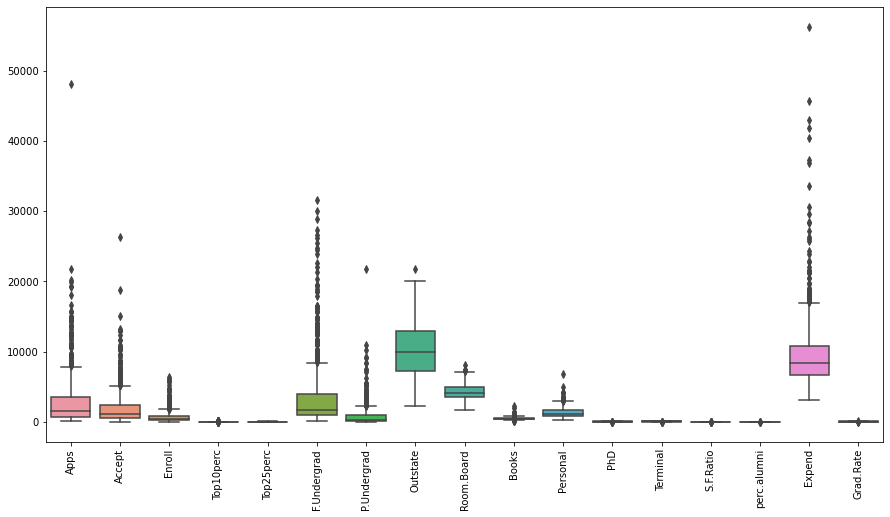
Boxplot of all the Attributes of Original Dataset to check for Outliers 

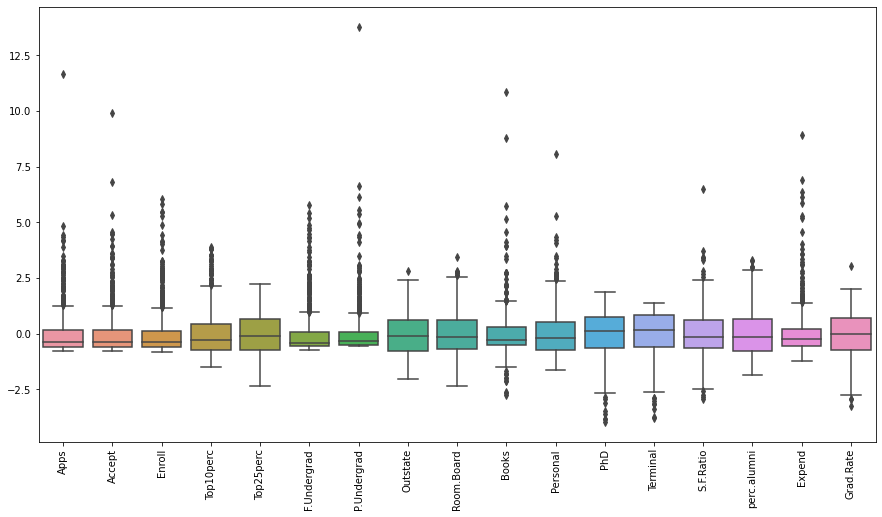

In [75]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data=edu_scaled)
plt.show()

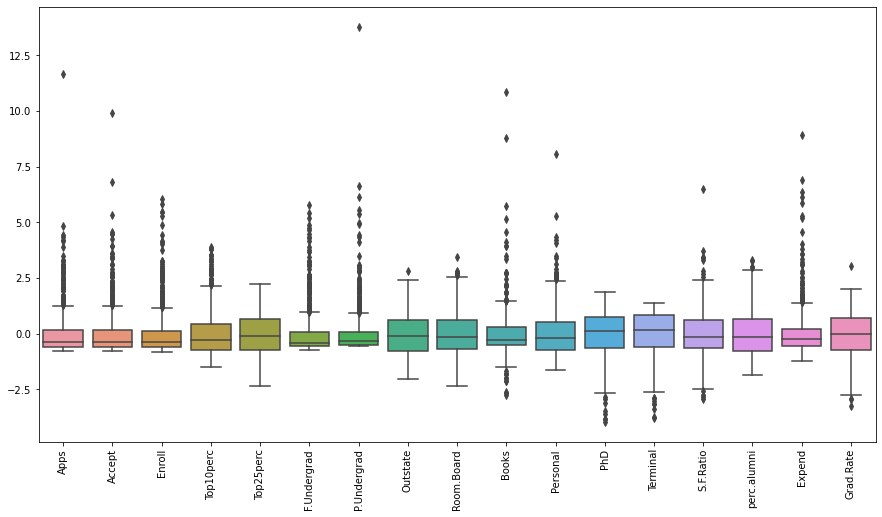
Boxplot of all the Attributes of Scaled Dataset to check for Outliers

**We can Inter that upon scaling the Dataset, We do not treat the Outliers but we ensure that the Attributes Means are all 0 and Variances 1.**

### 2.5. Extract the eigenvalues and eigenvectors.[Using Sklearn PCA Print Both]

In [76]:
edu_scaled_cov = np.cov(edu_scaled)

In [77]:
eig , eigv = np.linalg.eig(edu_scaled_cov)

In [78]:
eig = np.real(eig)

In [79]:
eig = sorted(eig,reverse=True)

In [80]:
eig[0:17]

[225.09375072515908,
 86.26531354873661,
 53.41961939946679,
 48.583579842205545,
 45.2510908430626,
 38.238826731597094,
 28.652708330647695,
 26.11287254512243,
 21.497086394781938,
 16.228140490471755,
 10.705379520702754,
 8.171740563657291,
 6.9831428512805225,
 4.282207511322702,
 1.7935302083639977,
 1.1255166831627155,
 1.4297919314602925e-14]

|Eigen Values(first 17 PCAs)|                      |
|------------------|----------------------------|
|225.09375072515908|                      |
| 86.26531354873661|                            |
| 53.41961939946679|                            |
| 48.583579842205545|                            |
| 45.2510908430626 |                            |
| 38.238826731597094|                            |
| 28.652708330647695|                            |
| 26.11287254512243|                            |
| 21.497086394781938|                            |
| 16.228140490471755|                            |
| 10.705379520702754|                            |
| 8.171740563657291|                            |
| 6.9831428512805225|                            |
| 4.282207511322702|                            |
| 1.7935302083639977|                            |
| 1.1255166831627155|                            |
| 1.4297919314602925e-14|                            |

In [81]:
eigv

array([[-0.02291878+0.j, -0.01899883+0.j, -0.01543293+0.j, ...,
         0.00212497+0.j, -0.01012364+0.j,  0.01317656+0.j],
       [-0.00729893+0.j, -0.05611688+0.j,  0.08133456+0.j, ...,
        -0.00047885+0.j,  0.00049484+0.j, -0.00103654+0.j],
       [ 0.00701199+0.j, -0.00828052+0.j, -0.00512522+0.j, ...,
         0.00121009+0.j, -0.00201818+0.j,  0.00209406+0.j],
       ...,
       [-0.00337752+0.j,  0.00373533+0.j,  0.00414249+0.j, ...,
        -0.01360796+0.j,  0.00729886+0.j, -0.0049793 +0.j],
       [ 0.08556901+0.j,  0.05433704+0.j,  0.09631354+0.j, ...,
        -0.01118215+0.j, -0.01222774+0.j,  0.01016684+0.j],
       [-0.0093721 +0.j, -0.0130087 +0.j, -0.06378785+0.j, ...,
         0.06459122+0.j, -0.02845904+0.j,  0.05259096+0.j]])

In [82]:
eigv = pd.DataFrame(eigv)

In [83]:
eigv

0                   1                   2    \
0   -0.022919+0.000000j -0.018999+0.000000j -0.015433+0.000000j   
1   -0.007299+0.000000j -0.056117+0.000000j  0.081335+0.000000j   
2    0.007012+0.000000j -0.008281+0.000000j -0.005125+0.000000j   
3    0.060368+0.000000j  0.033981+0.000000j  0.019605+0.000000j   
4   -0.015208+0.000000j -0.025249+0.000000j  0.079143+0.000000j   
..                  ...                 ...                 ...   
772 -0.041957+0.000000j -0.036483+0.000000j -0.025293+0.000000j   
773  0.011221+0.000000j -0.016373+0.000000j -0.006555+0.000000j   
774 -0.003378+0.000000j  0.003735+0.000000j  0.004142+0.000000j   
775  0.085569+0.000000j  0.054337+0.000000j  0.096314+0.000000j   
776 -0.009372+0.000000j -0.013009+0.000000j -0.063788+0.000000j   

                    3                   4                   5    \
0    0.029136+0.000000j -0.028335+0.000000j  0.016837+0.000000j   
1   -0.117802+0.000000j  0.042004+0.000000j  0.026261+0.000000j   
2   -0.022541+0.000000j -0.015303+0.000000j  0.039053+0.000000j   
3    0.057081+0.000000j -0.014407+0.000000j  0.007391+0.000000j   
4    0.057174+0.000000j  0.018533+0.000000j -0.051403+0.000000j   
..                  ...                 ...                 ...   
772 -0.010533+0.000000j  0.032081+0.000000j  0.006716+0.000000j   
773 -0.024601+0.000000j  0.017332+0.000000j  0.007922+0.000000j   
774 -0.001260+0.000000j -0.019143+0.000000j -0.039773+0.000000j   
775 -0.007773+0.000000j -0.044637+0.000000j  0.058639+0.000000j   
776 -0.014326+0.000000j -0.035182+0.000000j  0.001677+0.000000j   

                    6                   7                   8    \
0    0.048905+0.000000j  0.004521+0.000000j  0.004458+0.000000j   
1   -0.000689+0.000000j  0.052287+0.000000j  0.027513+0.000000j   
2   -0.019308+0.000000j  0.001863+0.000000j  0.039684+0.000000j   
3   -0.018605+0.000000j  0.038008+0.000000j  0.036335+0.000000j   
4   -0.014092+0.000000j  0.028938+0.000000j  0.059706+0.000000j   
..                  ...                 ...                 ...   
772 -0.020332+0.000000j  0.030473+0.000000j  0.043146+0.000000j   
773 -0.010011+0.000000j -0.022322+0.000000j -0.035166+0.000000j   
774 -0.019735+0.000000j  0.029140+0.000000j  0.029352+0.000000j   
775  0.023124+0.000000j  0.014897+0.000000j  0.065719+0.000000j   
776 -0.001818+0.000000j  0.003581+0.000000j -0.094044+0.000000j   

                    9    ...                 767                 768  \
0   -0.021455+0.000000j  ... -0.000490+0.000000j  0.000337+0.005015j   
1    0.036213+0.000000j  ... -0.000573+0.000000j  0.000537-0.001040j   
2    0.014708+0.000000j  ... -0.000317+0.000000j  0.000135+0.000392j   
3    0.024260+0.000000j  ...  0.000154+0.000000j -0.001955-0.002632j   
4   -0.004120+0.000000j  ...  0.000577+0.000000j -0.000062+0.002365j   
..                  ...  ...                 ...                 ...   
772 -0.008428+0.000000j  ... -0.002124+0.000000j  0.018204+0.011749j   
773  0.002770+0.000000j  ... -0.012782+0.000000j -0.028902+0.024637j   
774  0.023380+0.000000j  ...  0.112552+0.000000j -0.029751+0.019535j   
775 -0.104637+0.000000j  ... -0.001687+0.000000j -0.008880+0.006275j   
776 -0.018337+0.000000j  ...  0.076443+0.000000j  0.041750+0.044239j   

                    769                 770                 771  \
0    0.000337-0.005015j  0.007174-0.000875j  0.007174+0.000875j   
1    0.000537+0.001040j -0.000364+0.000422j -0.000364-0.000422j   
2    0.000135-0.000392j -0.000193+0.000442j -0.000193-0.000442j   
3   -0.001955+0.002632j -0.000618+0.000964j -0.000618-0.000964j   
4   -0.000062-0.002365j  0.000857-0.001884j  0.000857+0.001884j   
..                  ...                 ...                 ...   
772  0.018204-0.011749j -0.013185+0.007664j -0.013185-0.007664j   
773 -0.028902-0.024637j  0.063886-0.006348j  0.063886+0.006348j   
774 -0.029751-0.019535j  0.001697-0.017848j  0.001697+0.017848j   
775 -0.008880-0.006275j  0.002799+0.000887j  0.002799-0.000887j   
776

||0                           |1   |2   |3  |4  |5     |6      |7      |8        |9        |...      |767      |768      |769      |770      |771      |772      |773                |774                |775                |776                |
|------|----------------------------|----|----|---|---|------|-------|-------|---------|---------|---------|---------|---------|---------|---------|---------|---------|-------------------|-------------------|-------------------|-------------------|
|0     |-0.022919+0.000000j         |-0.018999+0.000000j|-0.015433+0.000000j|0.029136+0.000000j|-0.028335+0.000000j|0.016837+0.000000j|0.048905+0.000000j|0.004521+0.000000j|0.004458+0.000000j|-0.021455+0.000000j|...      |-0.000490+0.000000j|0.000337+0.005015j|0.000337-0.005015j|0.007174-0.000875j|0.007174+0.000875j|0.002435+0.002529j|0.002435-0.002529j |0.002125+0.000000j |-0.010124+0.000000j|0.013177+0.000000j |
|1     |-0.007299+0.000000j         |-0.056117+0.000000j|0.081335+0.000000j|-0.117802+0.000000j|0.042004+0.000000j|0.026261+0.000000j|-0.000689+0.000000j|0.052287+0.000000j|0.027513+0.000000j|0.036213+0.000000j|...      |-0.000573+0.000000j|0.000537-0.001040j|0.000537+0.001040j|-0.000364+0.000422j|-0.000364-0.000422j|-0.000224-0.000242j|-0.000224+0.000242j|-0.000479+0.000000j|0.000495+0.000000j |-0.001037+0.000000j|
|2     |0.007012+0.000000j          |-0.008281+0.000000j|-0.005125+0.000000j|-0.022541+0.000000j|-0.015303+0.000000j|0.039053+0.000000j|-0.019308+0.000000j|0.001863+0.000000j|0.039684+0.000000j|0.014708+0.000000j|...      |-0.000317+0.000000j|0.000135+0.000392j|0.000135-0.000392j|-0.000193+0.000442j|-0.000193-0.000442j|-0.000909-0.001164j|-0.000909+0.001164j|0.001210+0.000000j |-0.002018+0.000000j|0.002094+0.000000j |
|3     |0.060368+0.000000j          |0.033981+0.000000j|0.019605+0.000000j|0.057081+0.000000j|-0.014407+0.000000j|0.007391+0.000000j|-0.018605+0.000000j|0.038008+0.000000j|0.036335+0.000000j|0.024260+0.000000j|...      |0.000154+0.000000j|-0.001955-0.002632j|-0.001955+0.002632j|-0.000618+0.000964j|-0.000618-0.000964j|-0.002729-0.000666j|-0.002729+0.000666j|-0.004284+0.000000j|0.001727+0.000000j |-0.003126+0.000000j|
|4     |-0.015208+0.000000j         |-0.025249+0.000000j|0.079143+0.000000j|0.057174+0.000000j|0.018533+0.000000j|-0.051403+0.000000j|-0.014092+0.000000j|0.028938+0.000000j|0.059706+0.000000j|-0.004120+0.000000j|...      |0.000577+0.000000j|-0.000062+0.002365j|-0.000062-0.002365j|0.000857-0.001884j|0.000857+0.001884j|0.000791+0.000993j|0.000791-0.000993j |-0.000413+0.000000j|0.001025+0.000000j |0.001257+0.000000j |
|...   |...                         |... |... |...|...|...   |...    |...    |...      |...      |...      |...      |...      |...      |...      |...      |...      |...                |...                |...                |...                |
|772   |-0.041957+0.000000j         |-0.036483+0.000000j|-0.025293+0.000000j|-0.010533+0.000000j|0.032081+0.000000j|0.006716+0.000000j|-0.020332+0.000000j|0.030473+0.000000j|0.043146+0.000000j|-0.008428+0.000000j|...      |-0.002124+0.000000j|0.018204+0.011749j|0.018204-0.011749j|-0.013185+0.007664j|-0.013185-0.007664j|0.013215-0.027869j|0.013215+0.027869j |0.046113+0.000000j |-0.041526+0.000000j|0.050446+0.000000j |
|773   |0.011221+0.000000j          |-0.016373+0.000000j|-0.006555+0.000000j|-0.024601+0.000000j|0.017332+0.000000j|0.007922+0.000000j|-0.010011+0.000000j|-0.022322+0.000000j|-0.035166+0.000000j|0.002770+0.000000j|...      |-0.012782+0.000000j|-0.028902+0.024637j|-0.028902-0.024637j|0.063886-0.006348j|0.063886+0.006348j|-0.021738-0.020641j|-0.021738+0.020641j|0.039097+0.000000j |-0.013217+0.000000j|0.044926+0.000000j |
|774   |-0.003378+0.000000j         |0.003735+0.000000j|0.004142+0.000000j|-0.001260+0.000000j|-0.019143+0.000000j|-0.039773+0.000000j|-0.019735+0.000000j|0.029140+0.000000j|0.029352+0.000000j|0.023380+0.000000j|...      |0.112552+0.000000j|-0.029751+0.019535j|-0.029751-0.019535j|0.001697-0.017848j|0.001697+0.017848j|-0.018563+0.043634j|-0.018563-0.043634j|-0.013608+0.000000j|0.007299+0.000000j |-0.004979+0.000000j|
|775   |0.085569+0.000000j          |0.054337+0.000000j|0.096314+0.000000j|-0.007773+0.000000j|-0.044637+0.000000j|0.058639+0.000000j|0.023124+0.000000j|0.014897+0.000000j|0.065719+0.000000j|-0.104637+0.000000j|...      |-0.001687+0.000000j|-0.008880+0.006275j|-0.008880-0.006275j|0.002799+0.000887j|0.002799-0.000887j|-0.004219+0.004357j|-0.004219-0.004357j|-0.011182+0.000000j|-0.012228+0.000000j|0.010167+0.000000j |
|776   |-0.009372+0.000000j         |-0.013009+0.000000j|-0.063788+0.000000j|-0.014326+0.000000j|-0.035182+0.000000j|0.001677+0.000000j|-0.001818+0.000000j|0.003581+0.000000j|-0.094044+0.000000j|-0.018337+0.000000j|...      |0.076443+0.000000j|0.041750+0.044239j|0.041750-0.044239j|-0.025486-0.025382j|-0.025486+0.025382j|0.052483-0.019009j|0.052483+0.019009j |0.064591+0.000000j |-0.028459+0.000000j|0.052591+0.000000j |
||                            |    |    |   |   |      |       |       |         |         |         |         |         |         |         |         |         |                   |                   |                   |                   |

Eigen Vector

In [84]:
pca = PCA(n_components=8)
edu_pca = pca.fit_transform(edu_scaled)

In [85]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222])

||Eigen Values|                            |
|--|----------|----------------------------|
|1|5.45052162|                            |
|2|4.48360686|                            |
|3|1.17466761|                            |
|4|1.00820573|                            |
|5|0.93423123|                            |
|6|0.84849117|                            |
|7|0.6057878 |                            |
|8|0.58787222|                            |


In [86]:
pd.DataFrame(pca.components_)

0         1         2         3         4         5         6   \
0  0.248766  0.207602  0.176304  0.354274  0.344001  0.154641  0.026443   
1  0.331598  0.372117  0.403724 -0.082412 -0.044779  0.417674  0.315088   
2 -0.063092 -0.101249 -0.082986  0.035056 -0.024148 -0.061393  0.139682   
3  0.281311  0.267817  0.161827 -0.051547 -0.109767  0.100412 -0.158558   
4  0.005741  0.055786 -0.055694 -0.395434 -0.426534 -0.043454  0.302385   
5 -0.016237  0.007535 -0.042558 -0.052693  0.033092 -0.043454 -0.191199   
6 -0.042486 -0.012950 -0.027693 -0.161332 -0.118486 -0.025076  0.061042   
7 -0.103090 -0.056271  0.058662 -0.122678 -0.102492  0.078890  0.570784   

         7         8         9         10        11        12        13  \
0  0.294736  0.249030  0.064758 -0.042529  0.318313  0.317056 -0.176958   
1 -0.249644 -0.137809  0.056342  0.219929  0.058311  0.046429  0.246665   
2  0.046599  0.148967  0.677412  0.499721 -0.127028 -0.066038 -0.289848   
3  0.131291  0.184996  0.087089 -0.230711 -0.534725 -0.519443 -0.161189   
4  0.222532  0.560919 -0.127289 -0.222311  0.140166  0.204720 -0.079388   
5 -0.030000  0.162755  0.641055 -0.331398  0.091256  0.154928  0.487046   
6  0.108529  0.209744 -0.149692  0.633790 -0.001096 -0.028477  0.219259   
7  0.009846 -0.221453  0.213293 -0.232661 -0.077040 -0.012161 -0.083605   

         14        15        16  
0  0.205082  0.318909  0.252316  
1 -0.246595 -0.131690 -0.169241  
2 -0.146989  0.226744 -0.208065  
3  0.017314  0.079273  0.269129  
4 -0.216297  0.075958 -0.109268  
5 -0.047340 -0.298119  0.216163  
6  0.243321 -0.226584  0.559944  
7  0.678524 -0.054159 -0.005336

||0                           |1        |2        |3        |4        |5        |6        |7        |8        |9        |10       |11       |12       |13       |14       |15       |16       |
|------|----------------------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
|0     |0.248766                    |0.207602 |0.176304 |0.354274 |0.344001 |0.154641 |0.026443 |0.294736 |0.249030 |0.064758 |-0.042529|0.318313 |0.317056 |-0.176958|0.205082 |0.318909 |0.252316 |
|1     |0.331598                    |0.372117 |0.403724 |-0.082412|-0.044779|0.417674 |0.315088 |-0.249644|-0.137809|0.056342 |0.219929 |0.058311 |0.046429 |0.246665 |-0.246595|-0.131690|-0.169241|
|2     |-0.063092                   |-0.101249|-0.082986|0.035056 |-0.024148|-0.061393|0.139682 |0.046599 |0.148967 |0.677412 |0.499721 |-0.127028|-0.066038|-0.289848|-0.146989|0.226744 |-0.208065|
|3     |0.281311                    |0.267817 |0.161827 |-0.051547|-0.109767|0.100412 |-0.158558|0.131291 |0.184996 |0.087089 |-0.230711|-0.534725|-0.519443|-0.161189|0.017314 |0.079273 |0.269129 |
|4     |0.005741                    |0.055786 |-0.055694|-0.395434|-0.426534|-0.043454|0.302385 |0.222532 |0.560919 |-0.127289|-0.222311|0.140166 |0.204720 |-0.079388|-0.216297|0.075958 |-0.109268|
|5     |-0.016237                   |0.007535 |-0.042558|-0.052693|0.033092 |-0.043454|-0.191199|-0.030000|0.162755 |0.641055 |-0.331398|0.091256 |0.154928 |0.487046 |-0.047340|-0.298119|0.216163 |
|6     |-0.042486                   |-0.012950|-0.027693|-0.161332|-0.118486|-0.025076|0.061042 |0.108529 |0.209744 |-0.149692|0.633790 |-0.001096|-0.028477|0.219259 |0.243321 |-0.226584|0.559944 |
|7     |-0.103090                   |-0.056271|0.058662 |-0.122678|-0.102492|0.078890 |0.570784 |0.009846 |-0.221453|0.213293 |-0.232661|-0.077040|-0.012161|-0.083605|0.678524 |-0.054159|-0.005336|

Eigenvectors

### 2.6. Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [87]:
pca = PCA(n_components=8)
edu_pca = pca.fit_transform(edu_scaled)

In [88]:
pd.DataFrame(edu_pca)

0         1         2         3         4         5         6  \
0   -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306  0.638443   
1   -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137  0.236753   
2   -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592 -0.248276   
3    2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508 -1.249356   
4   -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918 -2.159220   
..        ...       ...       ...       ...       ...       ...       ...   
772 -3.328458  1.220255 -0.383388  0.108555  0.776996  0.309429 -0.165021   
773  0.199389 -0.686689  0.051564  0.562269  0.375191  0.373343  0.848453   
774 -0.732561 -0.077235 -0.000406  0.054316 -0.516021  0.468014 -1.317492   
775  7.919327 -2.068329  2.073564  0.852054 -0.947755 -2.069937  0.083328   
776 -0.469508  0.366661 -1.328915 -0.108023 -1.132176  0.839893  1.307313   

            7  
0   -0.879386  
1    0.046925  
2    0.308740  
3   -0.147694  
4   -0.624413  
..        ...  
772  0.347435  
773  0.626515  
774 -0.128288  
775 -0.552586  
776  0.627410  

[777 rows x 8 columns]

||0                           |1        |2        |3        |4        |5        |6        |7        |
|------|----------------------------|---------|---------|---------|---------|---------|---------|---------|
|0     |-1.592855                   |0.767334 |-0.101074|-0.921749|-0.743975|-0.298306|0.638443 |-0.879386|
|1     |-2.192402                   |-0.578830|2.278798 |3.588918 |1.059997 |-0.177137|0.236753 |0.046925 |
|2     |-1.430964                   |-1.092819|-0.438093|0.677241 |-0.369613|-0.960592|-0.248276|0.308740 |
|3     |2.855557                    |-2.630612|0.141722 |-1.295486|-0.183837|-1.059508|-1.249356|-0.147694|
|4     |-2.212008                   |0.021631 |2.387030 |-1.114538|0.684451 |0.004918 |-2.159220|-0.624413|
|...   |...                         |...      |...      |...      |...      |...      |...      |...      |
|772   |-3.328458                   |1.220255 |-0.383388|0.108555 |0.776996 |0.309429 |-0.165021|0.347435 |
|773   |0.199389                    |-0.686689|0.051564 |0.562269 |0.375191 |0.373343 |0.848453 |0.626515 |
|774   |-0.732561                   |-0.077235|-0.000406|0.054316 |-0.516021|0.468014 |-1.317492|-0.128288|
|775   |7.919327                    |-2.068329|2.073564 |0.852054 |-0.947755|-2.069937|0.083328 |-0.552586|
|776   |-0.469508                   |0.366661 |-1.328915|-0.108023|-1.132176|0.839893 |1.307313 |0.627410 |

Component Loadings

In [89]:
pd.DataFrame(pca.components_,columns=edu_scaled.columns).transpose()

0         1         2         3         4         5  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                    6         7  
Apps        -0.042486 -0.103090  
Accept      -0.012950 -0.056271  
Enroll      -0.027693  0.058662  
Top10perc   -0.161332 -0.122678  
Top25perc   -0.118486 -0.102492  
F.Undergrad -0.025076  0.078890  
P.Undergrad  0.061042  0.570784  
Outstate     0.108529  0.009846  
Room.Board   0.209744 -0.221453  
Books       -0.149692  0.213293  
Personal     0.633790 -0.232661  
PhD         -0.001096 -0.077040  
Terminal    -0.028477 -0.012161  
S.F.Ratio    0.219259 -0.083605  
perc.alumni  0.243321  0.678524  
Expend      -0.226584 -0.054159  
Grad.Rate    0.559944 -0.005336

||0                           |1        |2        |3        |4        |5        |6        |7        |
|------|----------------------------|---------|---------|---------|---------|---------|---------|---------|
|Apps  |0.248766                    |0.331598 |-0.063092|0.281311 |0.005741 |-0.016237|-0.042486|-0.103090|
|Accept|0.207602                    |0.372117 |-0.101249|0.267817 |0.055786 |0.007535 |-0.012950|-0.056271|
|Enroll|0.176304                    |0.403724 |-0.082986|0.161827 |-0.055694|-0.042558|-0.027693|0.058662 |
|Top10perc|0.354274                    |-0.082412|0.035056 |-0.051547|-0.395434|-0.052693|-0.161332|-0.122678|
|Top25perc|0.344001                    |-0.044779|-0.024148|-0.109767|-0.426534|0.033092 |-0.118486|-0.102492|
|F.Undergrad|0.154641                    |0.417674 |-0.061393|0.100412 |-0.043454|-0.043454|-0.025076|0.078890 |
|P.Undergrad|0.026443                    |0.315088 |0.139682 |-0.158558|0.302385 |-0.191199|0.061042 |0.570784 |
|Outstate|0.294736                    |-0.249644|0.046599 |0.131291 |0.222532 |-0.030000|0.108529 |0.009846 |
|Room.Board|0.249030                    |-0.137809|0.148967 |0.184996 |0.560919 |0.162755 |0.209744 |-0.221453|
|Books |0.064758                    |0.056342 |0.677412 |0.087089 |-0.127289|0.641055 |-0.149692|0.213293 |
|Personal|-0.042529                   |0.219929 |0.499721 |-0.230711|-0.222311|-0.331398|0.633790 |-0.232661|
|PhD   |0.318313                    |0.058311 |-0.127028|-0.534725|0.140166 |0.091256 |-0.001096|-0.077040|
|Terminal|0.317056                    |0.046429 |-0.066038|-0.519443|0.204720 |0.154928 |-0.028477|-0.012161|
|S.F.Ratio|-0.176958                   |0.246665 |-0.289848|-0.161189|-0.079388|0.487046 |0.219259 |-0.083605|
|perc.alumni|0.205082                    |-0.246595|-0.146989|0.017314 |-0.216297|-0.047340|0.243321 |0.678524 |
|Expend|0.318909                    |-0.131690|0.226744 |0.079273 |0.075958 |-0.298119|-0.226584|-0.054159|
|Grad.Rate|0.252316                    |-0.169241|-0.208065|0.269129 |-0.109268|0.216163 |0.559944 |-0.005336|


Data of principal Component into Data Frame with Original Features

### 2.7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [90]:
round(pd.DataFrame(pca.components_,columns=edu_scaled.columns).transpose(),2)

0     1     2     3     4     5     6     7
Apps         0.25  0.33 -0.06  0.28  0.01 -0.02 -0.04 -0.10
Accept       0.21  0.37 -0.10  0.27  0.06  0.01 -0.01 -0.06
Enroll       0.18  0.40 -0.08  0.16 -0.06 -0.04 -0.03  0.06
Top10perc    0.35 -0.08  0.04 -0.05 -0.40 -0.05 -0.16 -0.12
Top25perc    0.34 -0.04 -0.02 -0.11 -0.43  0.03 -0.12 -0.10
F.Undergrad  0.15  0.42 -0.06  0.10 -0.04 -0.04 -0.03  0.08
P.Undergrad  0.03  0.32  0.14 -0.16  0.30 -0.19  0.06  0.57
Outstate     0.29 -0.25  0.05  0.13  0.22 -0.03  0.11  0.01
Room.Board   0.25 -0.14  0.15  0.18  0.56  0.16  0.21 -0.22
Books        0.06  0.06  0.68  0.09 -0.13  0.64 -0.15  0.21
Personal    -0.04  0.22  0.50 -0.23 -0.22 -0.33  0.63 -0.23
PhD          0.32  0.06 -0.13 -0.53  0.14  0.09 -0.00 -0.08
Terminal     0.32  0.05 -0.07 -0.52  0.20  0.15 -0.03 -0.01
S.F.Ratio   -0.18  0.25 -0.29 -0.16 -0.08  0.49  0.22 -0.08
perc.alumni  0.21 -0.25 -0.15  0.02 -0.22 -0.05  0.24  0.68
Expend       0.32 -0.13  0.23  0.08  0.08 -0.30 -0.23 -0.05
Grad.Rate    0.25 -0.17 -0.21  0.27 -0.11  0.22  0.56 -0.01

**PC1** = 0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books - 0.04 * Personal + 0.32 * PhD + 0.32 * Terminal - 0.04 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate

**Explicit Form of the first PC**

Similarly we can write Expilicit form for all PCs

### 2.8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [91]:
Explained = (np.cumsum(eig[0:17])/ np.sum(eig)) *100

In [92]:
Explained

array([ 36.16518654,  50.02519442,  58.60797601,  66.41376459,
        73.68413143,  79.82785731,  84.43140822,  88.62689079,
        92.08076784,  94.68809801,  96.40810155,  97.72103237,
        98.84299449,  99.53100486,  99.81916637, 100.        ,
       100.        ])

||Cumulative Values of Eigenvalues|                            |
|-----|:-----------:|----------------------------|
|1|36.16518654|                            |
|2|50.02519442|                            |
|3|58.60797601|                            |
|4|66.41376459|                            |
|5|73.68413143|                            |
|6|79.82785731|                            |
|7|84.43140822|                            |
|8|88.62689079|                            |
|9|92.08076784|                            |
|10|94.68809801|                            |
|11|96.40810155|                            |
|12|97.72103237|                            |
|13|98.84299449|                            |
|14| 99.53100486|                            |
|15|99.81916637|                            |
|16|100.        |                            |
|17|100.       |                            |

* From the Above Cumulative Value table of Eigenvalues, we see that from the First 8 Components we have 88% total variation explained. Hence we consider only 8 Components.
* Thus with the help of Cumulative Value table of Eigenvalues, we will be able to decide on the optimum number of principal components
* Eigenvectors represent directions

### 2.9. Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

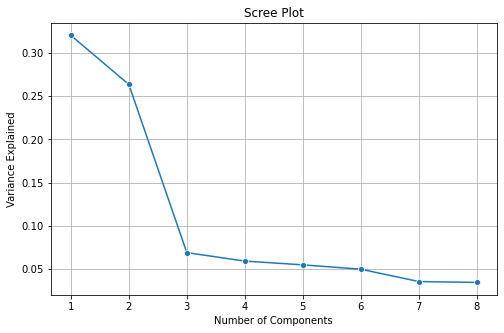

In [94]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,9),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

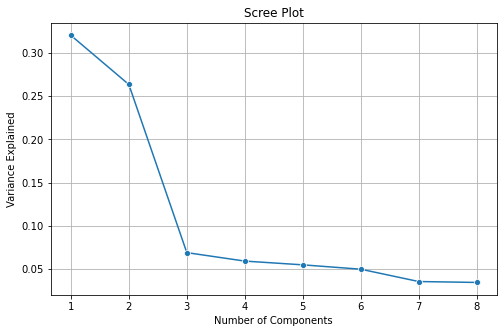

Fig 7: Scree Plot 

In [95]:
edu_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8'],
                                    index = edu_scaled.columns)

In [96]:
edu_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8  
Apps        -0.042486 -0.103090  
Accept      -0.012950 -0.056271  
Enroll      -0.027693  0.058662  
Top10perc   -0.161332 -0.122678  
Top25perc   -0.118486 -0.102492  
F.Undergrad -0.025076  0.078890  
P.Undergrad  0.061042  0.570784  
Outstate     0.108529  0.009846  
Room.Board   0.209744 -0.221453  
Books       -0.149692  0.213293  
Personal     0.633790 -0.232661  
PhD         -0.001096 -0.077040  
Terminal    -0.028477 -0.012161  
S.F.Ratio    0.219259 -0.083605  
perc.alumni  0.243321  0.678524  
Expend      -0.226584 -0.054159  
Grad.Rate    0.559944 -0.005336

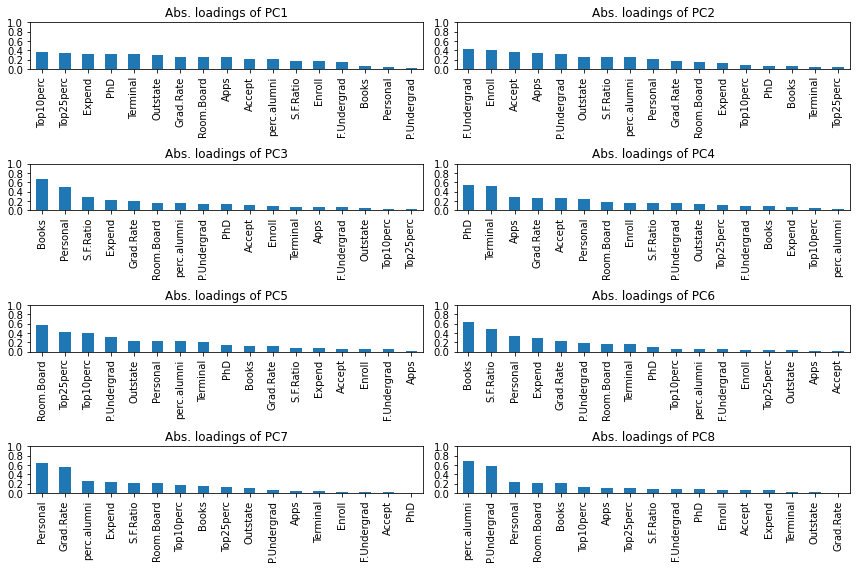

In [99]:

plt.figure(figsize = (12,8))
for i in range(len(edu_extracted_loadings.columns)):
    plt.subplot(4,2,i+1)
    abs(edu_extracted_loadings[edu_extracted_loadings.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(edu_extracted_loadings.columns[i]))
    plt.tight_layout()

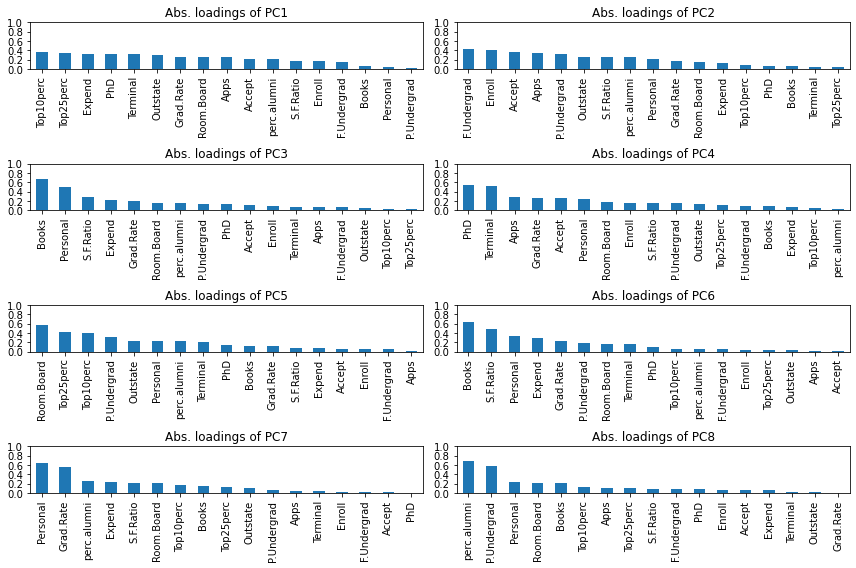

Fig 8: Absolute loadings of all PCs

With help of PCA we have been able to reduce 18 numeric features into 8 components which is able to explain 88.6% of variance in the data

Using the components, additional rules can be derived and analyzed.

Unsupervised learning like clustering can further be applied on the data to segment the Colleges / Universities based on the components & can further be analyzed.

# The END